# Predict Bike Sharing Demand with AutoGluon Template

## Project: Predict Bike Sharing Demand with AutoGluon
This notebook is a template with each step that you need to complete for the project.

Please fill in your code where there are explicit `?` markers in the notebook. You are welcome to add more cells and code as you see fit.

Once you have completed all the code implementations, please export your notebook as a HTML file so the reviews can view your code. Make sure you have all outputs correctly outputted.

`File-> Export Notebook As... -> Export Notebook as HTML`

There is a writeup to complete as well after all code implememtation is done. Please answer all questions and attach the necessary tables and charts. You can complete the writeup in either markdown or PDF.

Completing the code template and writeup template will cover all of the rubric points for this project.

The rubric contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this notebook and also discuss the results in the writeup file.

## Step 1: Create an account with Kaggle

### Create Kaggle Account and download API key
Below is example of steps to get the API username and key. Each student will have their own username and key.

1. Open account settings.
2. Scroll down to API and click Create New API Token.
3. Open up `kaggle.json` and use the username and key.


## Step 2: Download the Kaggle dataset using the kaggle python library

### Open up Sagemaker Studio and use starter template

1. Notebook should be using a `ml.t3.medium` instance (2 vCPU + 4 GiB)
2. Notebook should be using kernal: `Python 3 (MXNet 1.8 Python 3.7 CPU Optimized)`

### Install packages

In [ ]:
!pip install -U pip
!pip install -U setuptools wheel
!pip install -U "mxnet<2.0.0" bokeh==2.0.1
!pip install autogluon --no-cache-dir
# Without --no-cache-dir, smaller aws instances may have trouble installing

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


### Setup Kaggle API Key

In [ ]:
# create the .kaggle directory and an empty kaggle.json file
!mkdir -p /root/.kaggle
!touch /root/.kaggle/kaggle.json
!chmod 600 /root/.kaggle/kaggle.json

In [ ]:
# Fill in your user name and key from creating the kaggle account and API token file
import json
kaggle_username = "Your usernamen"
kaggle_key = "kaggel_key"

# Save API token the kaggle.json file
with open("/root/.kaggle/kaggle.json", "w") as f:
    f.write(json.dumps({"username": kaggle_username, "key": kaggle_key}))

### Download and explore dataset

### Go to the bike sharing demand competition and agree to the terms

In [ ]:
# Download the dataset, it will be in a .zip file so you'll need to unzip it as well.
!kaggle competitions download -c bike-sharing-demand
# If you already downloaded it you can use the -o command to overwrite the file
!unzip -o bike-sharing-demand.zip

bike-sharing-demand.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  bike-sharing-demand.zip
  inflating: sampleSubmission.csv    
  inflating: test.csv                
  inflating: train.csv               


In [ ]:
import pandas as pd
from autogluon.tabular import TabularPredictor

In [ ]:
# Create the train dataset in pandas by reading the csv
# Set the parsing of the datetime column so you can use some of the `dt` features in pandas later
train = pd.read_csv("/content/train.csv", parse_dates=["datetime"])
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [ ]:
# Simple output of the train dataset to view some of the min/max/varition of the dataset features.
train.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [ ]:
# Create the test pandas dataframe in pandas by reading the csv, remember to parse the datetime!
test = pd.read_csv("/content/test.csv")
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [ ]:
# Same thing as train and test dataset
submission = pd.read_csv("/content/sampleSubmission.csv")
submission.head()

,datetime,count
0,2011-01-20 00:00:00,0
1,2011-01-20 01:00:00,0
2,2011-01-20 02:00:00,0
3,2011-01-20 03:00:00,0
4,2011-01-20 04:00:00,0


## Step 3: Train a model using AutoGluon’s Tabular Prediction

Requirements:
* We are prediting `count`, so it is the label we are setting.
* Ignore `casual` and `registered` columns as they are also not present in the test dataset.
* Use the `root_mean_squared_error` as the metric to use for evaluation.
* Set a time limit of 10 minutes (600 seconds).
* Use the preset `best_quality` to focus on creating the best model.

In [ ]:
predictor = TabularPredictor(label="count", eval_metric="rmse").fit(train_data=train.drop(['casual' , 'registered'], axis=1), time_limit=600, presets="best_quality")

No path specified. Models will be saved in: "AutogluonModels/ag-20230528_092710/"
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=20
Beginning AutoGluon training ... Time limit = 600s
AutoGluon will save models to "AutogluonModels/ag-20230528_092710/"
AutoGluon Version:  0.7.0
Python Version:     3.10.11
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP Sat Apr 29 09:15:28 UTC 2023
Train Data Rows:    10886
Train Data Columns: 9
Label Column: count
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == int and many unique label-values observed).
	Label info (max, min, mean, stddev): (977, 1, 191.57413, 181.14445)
	If 'regression' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Using Fe

### Review AutoGluon's training run with ranking of models that did the best.

In [ ]:
predictor.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                     model   score_val  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0      WeightedEnsemble_L3  -53.091802      31.059938  505.987334                0.000792           0.216398            3       True         12
1   RandomForestMSE_BAG_L2  -53.397135      23.358051  390.341132                0.674675          47.766219            2       True         11
2          LightGBM_BAG_L2  -55.114028      23.113285  380.751940                0.429909          38.177027            2       True         10
3        LightGBMXT_BAG_L2  -60.086248      29.954563  419.827690                7.271186          77.252777            2       True          9
4    KNeighborsDist_BAG_L1  -84.125061       0.108940    0.062858                0.108940           0.062858            1       True          2
5      WeightedEnsemble_L2  -84.125061       0.111899    1.396866         

/usr/local/lib/python3.10/dist-packages/autogluon/core/utils/plots.py:138: UserWarning: AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"
  warnings.warn('AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"')


{'model_types': {'KNeighborsUnif_BAG_L1': 'StackerEnsembleModel_KNN',
  'KNeighborsDist_BAG_L1': 'StackerEnsembleModel_KNN',
  'LightGBMXT_BAG_L1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L1': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L1': 'StackerEnsembleModel_CatBoost',
  'ExtraTreesMSE_BAG_L1': 'StackerEnsembleModel_XT',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'LightGBMXT_BAG_L2': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L2': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L2': 'StackerEnsembleModel_RF',
  'WeightedEnsemble_L3': 'WeightedEnsembleModel'},
 'model_performance': {'KNeighborsUnif_BAG_L1': -101.54619908446061,
  'KNeighborsDist_BAG_L1': -84.12506123181602,
  'LightGBMXT_BAG_L1': -131.46090891834504,
  'LightGBM_BAG_L1': -131.054161598899,
  'RandomForestMSE_BAG_L1': -116.54835939455667,
  'CatBoost_BAG_L1': -130.78854073008847,
  'ExtraTreesMSE_BAG_L1': -124.60067564699747,
  'WeightedEnsemble

In [ ]:
predictor.leaderboard()

                     model   score_val  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0      WeightedEnsemble_L3  -53.091802      31.059938  505.987334                0.000792           0.216398            3       True         12
1   RandomForestMSE_BAG_L2  -53.397135      23.358051  390.341132                0.674675          47.766219            2       True         11
2          LightGBM_BAG_L2  -55.114028      23.113285  380.751940                0.429909          38.177027            2       True         10
3        LightGBMXT_BAG_L2  -60.086248      29.954563  419.827690                7.271186          77.252777            2       True          9
4    KNeighborsDist_BAG_L1  -84.125061       0.108940    0.062858                0.108940           0.062858            1       True          2
5      WeightedEnsemble_L2  -84.125061       0.111899    1.396866                0.002959           1.334008            2       True    

,model,score_val,pred_time_val,fit_time,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,WeightedEnsemble_L3,-53.091802,31.059938,505.987334,0.000792,0.216398,3,True,12
1,RandomForestMSE_BAG_L2,-53.397135,23.358051,390.341132,0.674675,47.766219,2,True,11
2,LightGBM_BAG_L2,-55.114028,23.113285,380.751940,0.429909,38.177027,2,True,10
3,LightGBMXT_BAG_L2,-60.086248,29.954563,419.827690,7.271186,77.252777,2,True,9
4,KNeighborsDist_BAG_L1,-84.125061,0.108940,0.062858,0.108940,0.062858,1,True,2
5,WeightedEnsemble_L2,-84.125061,0.111899,1.396866,0.002959,1.334008,2,True,8
6,KNeighborsUnif_BAG_L1,-101.546199,0.082919,0.061265,0.082919,0.061265,1,True,1
7,RandomForestMSE_BAG_L1,-116.548359,0.583441,19.553150,0.583441,19.553150,1,True,5
8,ExtraTreesMSE_BAG_L1,-124.600676,0.798644,8.545218,0.798644,8.545218,1,True,7
9,CatBoost_BAG_L1,-130.788541,0.095567,168.454668,0.095567,168.454668,1,True,6


                     model   score_val  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0      WeightedEnsemble_L3  -53.091802      31.059938  505.987334                0.000792           0.216398            3       True         12
1   RandomForestMSE_BAG_L2  -53.397135      23.358051  390.341132                0.674675          47.766219            2       True         11
2          LightGBM_BAG_L2  -55.114028      23.113285  380.751940                0.429909          38.177027            2       True         10
3        LightGBMXT_BAG_L2  -60.086248      29.954563  419.827690                7.271186          77.252777            2       True          9
4    KNeighborsDist_BAG_L1  -84.125061       0.108940    0.062858                0.108940           0.062858            1       True          2
5      WeightedEnsemble_L2  -84.125061       0.111899    1.396866                0.002959           1.334008            2       True    

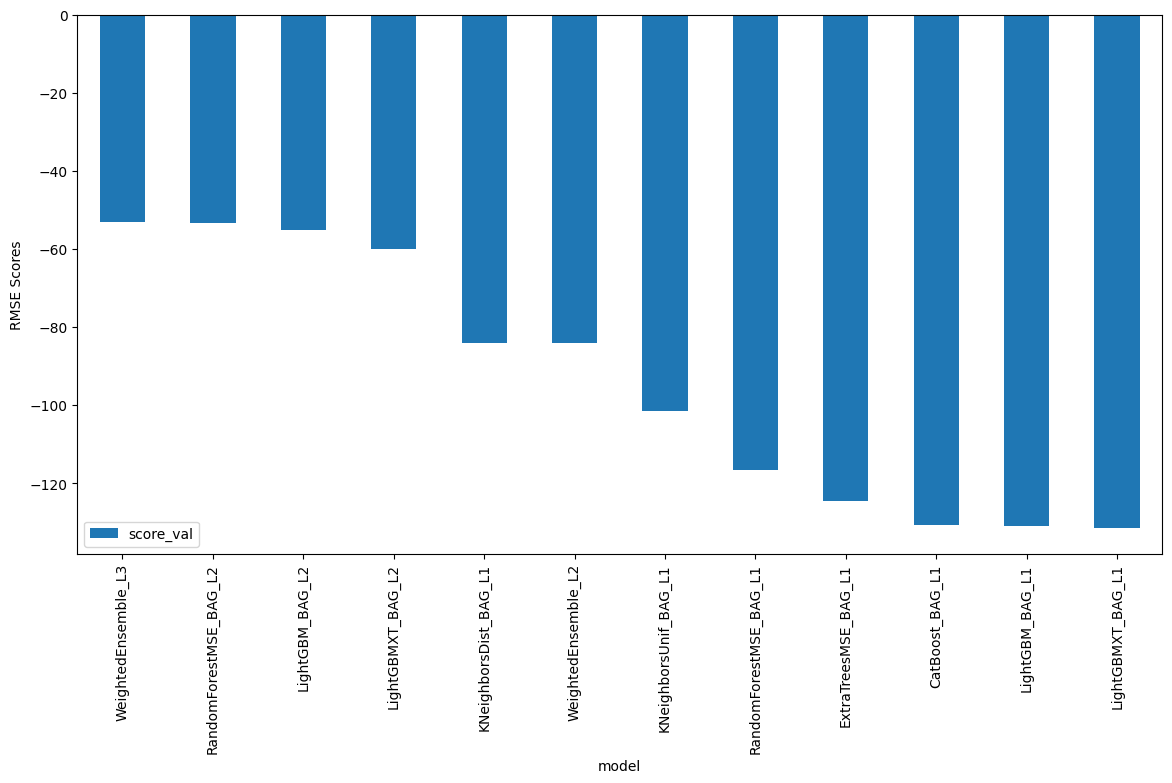

In [ ]:
# Output the model's `score_val` in a bar chart to compare performance
import matplotlib.pyplot as plt
predictor.leaderboard().plot(kind="bar", x="model", y="score_val", figsize=(14, 7))
plt.ylabel("RMSE Scores")
plt.show()

### Create predictions from test dataset

In [ ]:
predictions1 = predictor.predict(test)
predictions1

0        23.278118
1        41.788616
2        45.570278
3        48.738007
4        51.619278
           ...    
6488    161.675034
6489    161.727951
6490    155.707520
6491    150.931625
6492    148.845459
Name: count, Length: 6493, dtype: float32

In [ ]:
predictions = {'datetime': test['datetime'], 'Pred_count': predictions1}
predictions = pd.DataFrame(data=predictions)
predictions.head()

,datetime,Pred_count
0,2011-01-20 00:00:00,23.278118
1,2011-01-20 01:00:00,41.788616
2,2011-01-20 02:00:00,45.570278
3,2011-01-20 03:00:00,48.738007
4,2011-01-20 04:00:00,51.619278


#### NOTE: Kaggle will reject the submission if we don't set everything to be > 0.

In [ ]:
# Describe the `predictions` series to see if there are any negative values
predictions.describe()

,Pred_count
count,6493.000000
mean,100.679924
std,90.183510
min,2.868417
25%,19.941090
50%,64.186752
75%,167.916656
max,368.843262


In [ ]:
# How many negative values do we have?
# Rechecking the predictions
negative_pred_count = predictions1.apply(lambda x: 1 if x<0 else 0)

pred_pos_count = (negative_pred_count==0).sum()
pred_neg_count = (negative_pred_count==1).sum()

print("Total predictions                :", len(predictions.index))
print("Total positive prediction  :", pred_pos_count)
print("Total negative prediction  :", pred_neg_count)

Total predictions                : 6493
Total positive prediction  : 6493
Total negative prediction  : 0


In [ ]:
# Set them to zero
predictions1[predictions1<0]=0

# Rechecking, if any predictions are less than 0
negative_pred_count = predictions1.apply(lambda x: 1 if x<0 else 0)
pred_neg_count = (negative_pred_count==1).sum()
print(f"No. of negative predictions: {pred_neg_count}")
print("All negative values in the predictions (if any) are set to zero successfully.")

No. of negative predictions: 0
All negative values in the predictions (if any) are set to zero successfully.


### Set predictions to submission dataframe, save, and submit

In [ ]:
submission["count"] = predictions1
submission.to_csv("submission.csv", index=False)

In [ ]:
!kaggle competitions submit -c bike-sharing-demand -f submission.csv -m "first raw submission"

100% 188k/188k [00:00<00:00, 898kB/s]
Successfully submitted to Bike Sharing Demand

#### View submission via the command line or in the web browser under the competition's page - `My Submissions`

In [ ]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

fileName        date                 description           status    publicScore  privateScore  
--------------  -------------------  --------------------  --------  -----------  ------------  
submission.csv  2023-05-28 09:38:25  first raw submission  pending                              
submission.csv  2023-05-28 08:50:43  first raw submission  complete  1.80552      1.80552       


#### Initial score of `1.80552`

## Step 4: Exploratory Data Analysis and Creating an additional feature
* Any additional feature will do, but a great suggestion would be to separate out the datetime into hour, day, or month parts.

array([[<Axes: title={'center': 'datetime'}>,
        <Axes: title={'center': 'season'}>,
        <Axes: title={'center': 'holiday'}>],
       [<Axes: title={'center': 'workingday'}>,
        <Axes: title={'center': 'weather'}>,
        <Axes: title={'center': 'temp'}>],
       [<Axes: title={'center': 'atemp'}>,
        <Axes: title={'center': 'humidity'}>,
        <Axes: title={'center': 'windspeed'}>],
       [<Axes: title={'center': 'casual'}>,
        <Axes: title={'center': 'registered'}>,
        <Axes: title={'center': 'count'}>]], dtype=object)

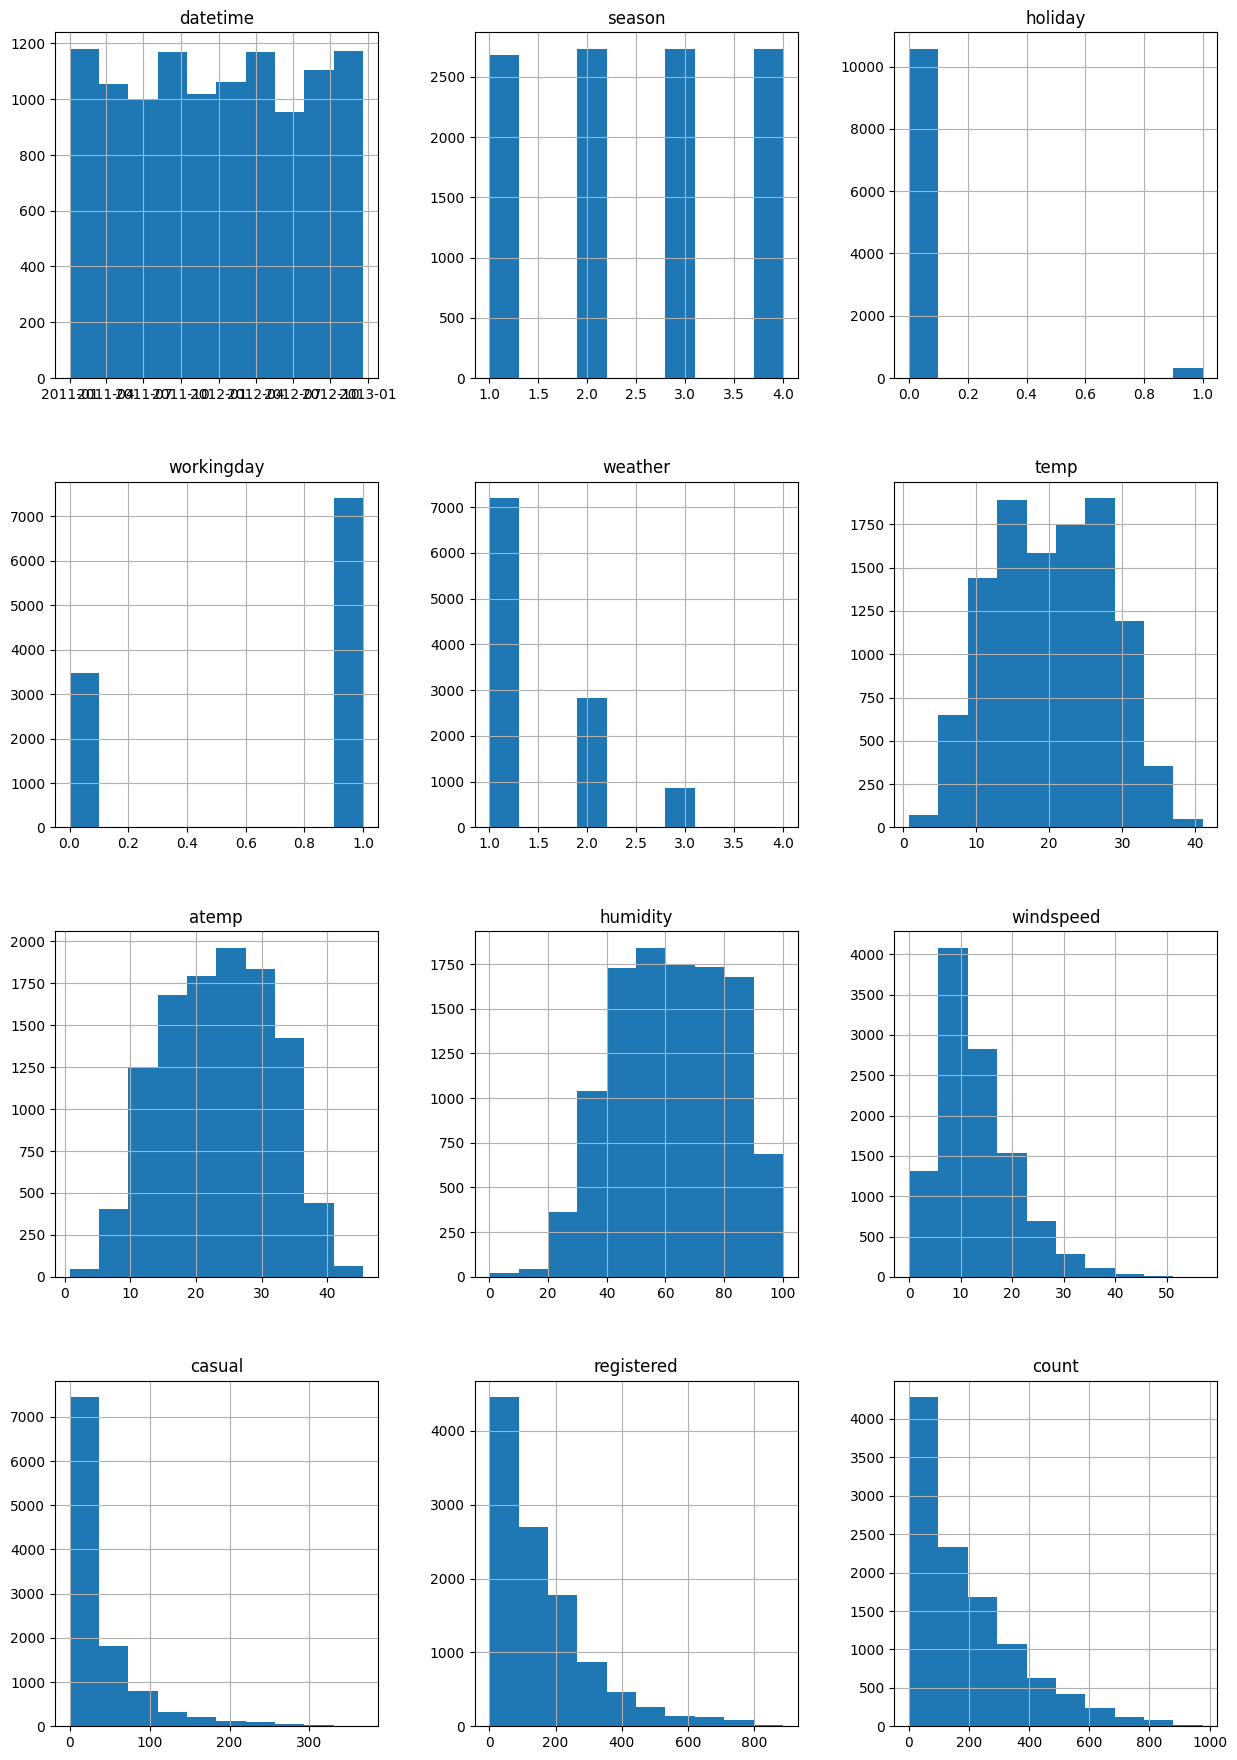

In [ ]:
# Create a histogram of all features to show the distribution of each one relative to the data. This is part of the exploritory data analysis
train.hist(figsize=(15,22))

In [ ]:
corr_matrix = train.corr()
corr_matrix

<ipython-input-23-310b2495afb6>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = train.corr()


,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
season,1.000000,0.029368,-0.008126,0.008879,0.258689,0.264744,0.190610,-0.147121,0.096758,0.164011,0.163439
holiday,0.029368,1.000000,-0.250491,-0.007074,0.000295,-0.005215,0.001929,0.008409,0.043799,-0.020956,-0.005393
workingday,-0.008126,-0.250491,1.000000,0.033772,0.029966,0.024660,-0.010880,0.013373,-0.319111,0.119460,0.011594
weather,0.008879,-0.007074,0.033772,1.000000,-0.055035,-0.055376,0.406244,0.007261,-0.135918,-0.109340,-0.128655
temp,0.258689,0.000295,0.029966,-0.055035,1.000000,0.984948,-0.064949,-0.017852,0.467097,0.318571,0.394454
atemp,0.264744,-0.005215,0.024660,-0.055376,0.984948,1.000000,-0.043536,-0.057473,0.462067,0.314635,0.389784
humidity,0.190610,0.001929,-0.010880,0.406244,-0.064949,-0.043536,1.000000,-0.318607,-0.348187,-0.265458,-0.317371
windspeed,-0.147121,0.008409,0.013373,0.007261,-0.017852,-0.057473,-0.318607,1.000000,0.092276,0.091052,0.101369
casual,0.096758,0.043799,-0.319111,-0.135918,0.467097,0.462067,-0.348187,0.092276,1.000000,0.497250,0.690414
registered,0.164011,-0.020956,0.119460,-0.109340,0.318571,0.314635,-0.265458,0.091052,0.497250,1.000000,0.970948


Text(0.5, 1.0, 'HeatMap: Correlation Matrix')

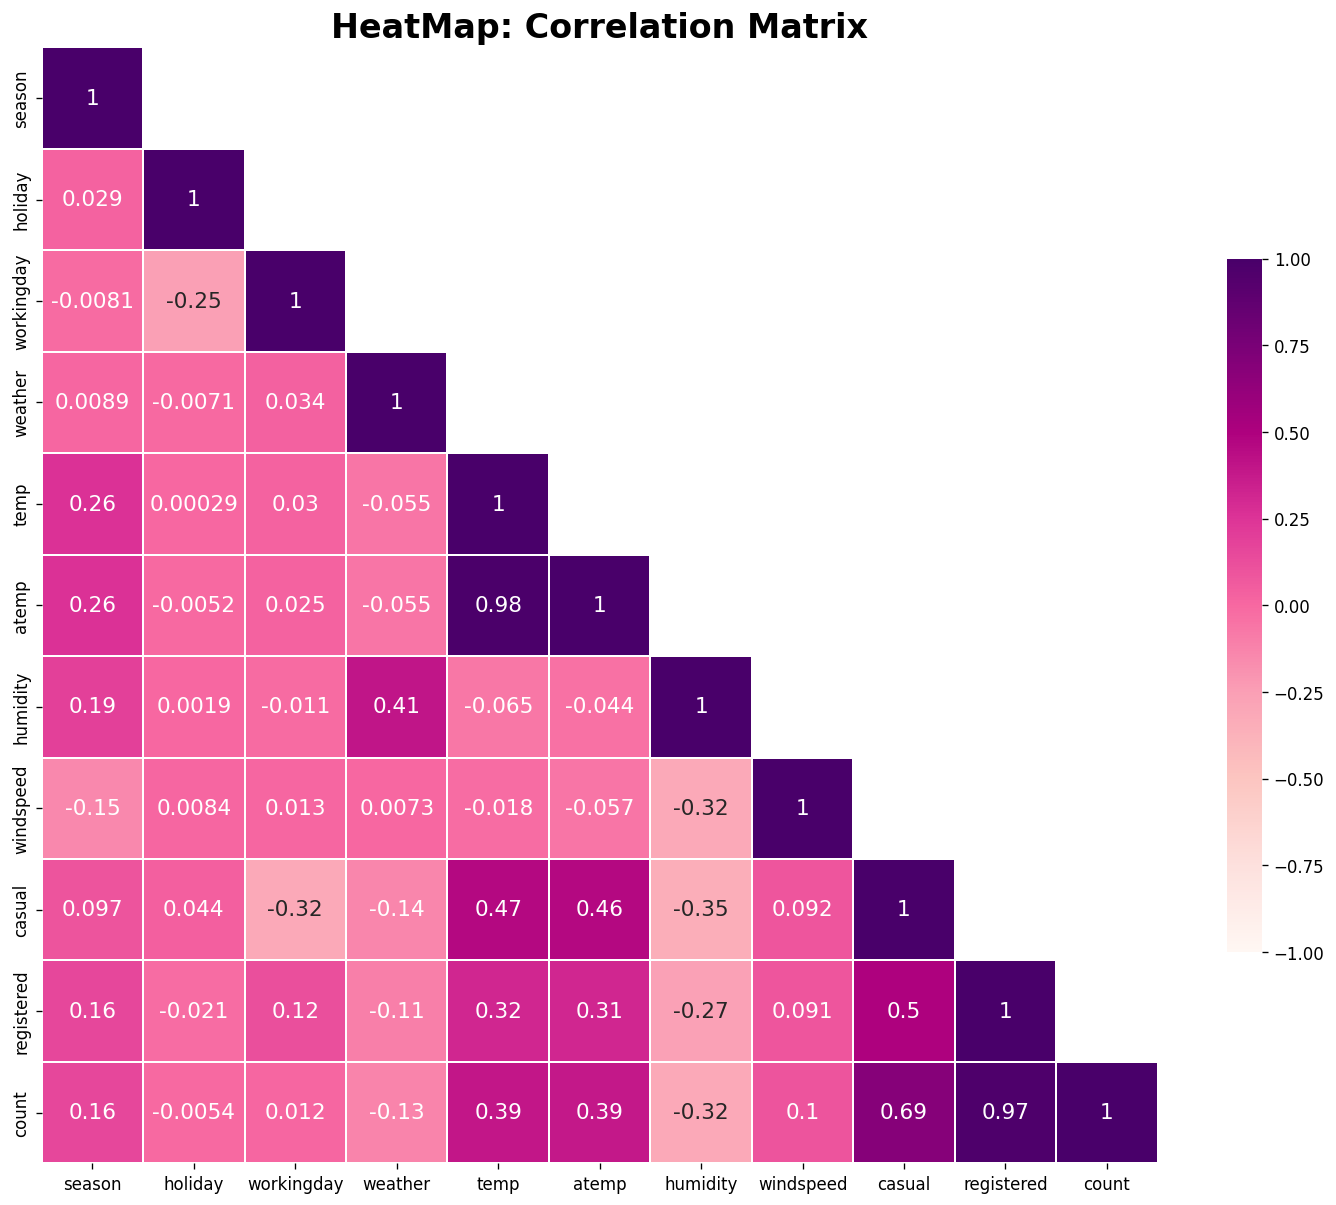

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sb

plt.figure(figsize = (15,15), dpi=120)
# Create a mask to eliminate redundant repetitive correlations
corr_mask = np.array(corr_matrix)
corr_mask[np.tril_indices_from(corr_mask)] = False
sb.heatmap(corr_matrix, cmap= 'RdPu', cbar_kws={"shrink": .5}, vmin= -1, vmax=1, center=0,
            square=True, mask=corr_mask, annot=True, linewidths=0.01, annot_kws={"size":13})
plt.title("HeatMap: Correlation Matrix", fontsize=20, fontweight='bold')

**CREATING NEW FEATURES**

In [ ]:
train['datetime'].head()


0   2011-01-01 00:00:00
1   2011-01-01 01:00:00
2   2011-01-01 02:00:00
3   2011-01-01 03:00:00
4   2011-01-01 04:00:00
Name: datetime, dtype: datetime64[ns]

Observation:

Variation is seen on hourly basis. So splitting the 'datetime' feature into year, month, day (dayofweek) and hour respectively.

In [ ]:
# Splitting the 'datetime' feature in train data
train["year"] = train["datetime"].dt.year
train["month"] = train["datetime"].dt.month
train["day"] = train["datetime"].dt.dayofweek  # Note: day -> dayofweek (0->Monday, 6->Sunday)
train["hour"] = train["datetime"].dt.hour
train.drop(["datetime"], axis=1, inplace=True)     # Drop 'datetime' feature
train.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour
0,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,5,0
1,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,5,1
2,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,5,2
3,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,5,3
4,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,5,4


In [ ]:
# Splitting the 'datetime' feature in test data
test=pd.read_csv("/content/test.csv" , parse_dates=["datetime"])
test["year"] = test["datetime"].dt.year
test["month"] = test["datetime"].dt.month
test["day"] = test["datetime"].dt.dayofweek  # Note: day -> dayofweek (0->Monday, 6->Sunday)
test["hour"] = test["datetime"].dt.hour
test.drop(["datetime"], axis=1, inplace=True)   # Drop 'datetime' feature
test.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,day,hour
0,1,0,1,1,10.66,11.365,56,26.0027,2011,1,3,0
1,1,0,1,1,10.66,13.635,56,0.0000,2011,1,3,1
2,1,0,1,1,10.66,13.635,56,0.0000,2011,1,3,2
3,1,0,1,1,10.66,12.880,56,11.0014,2011,1,3,3
4,1,0,1,1,10.66,12.880,56,11.0014,2011,1,3,4


## Make category types for these so models know they are not just numbers
* AutoGluon originally sees these as ints, but in reality they are int representations of a category.
* Setting the dtype to category will classify these as categories in AutoGluon.

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      10886 non-null  int64  
 1   holiday     10886 non-null  int64  
 2   workingday  10886 non-null  int64  
 3   weather     10886 non-null  int64  
 4   temp        10886 non-null  float64
 5   atemp       10886 non-null  float64
 6   humidity    10886 non-null  int64  
 7   windspeed   10886 non-null  float64
 8   casual      10886 non-null  int64  
 9   registered  10886 non-null  int64  
 10  count       10886 non-null  int64  
 11  year        10886 non-null  int64  
 12  month       10886 non-null  int64  
 13  day         10886 non-null  int64  
 14  hour        10886 non-null  int64  
dtypes: float64(3), int64(12)
memory usage: 1.2 MB


In [ ]:
# Convert 'int' feature columns that are categorical in nature to 'category' type
train["season"] = train["season"].astype("category")
train["weather"] = train["weather"].astype("category")

test["season"] = test["season"].astype("category")
test["weather"] = test["weather"].astype("category")

In [ ]:
# View are new feature
train.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour
0,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,5,0
1,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,5,1
2,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,5,2
3,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,5,3
4,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,5,4


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      10886 non-null  category
 1   holiday     10886 non-null  int64   
 2   workingday  10886 non-null  int64   
 3   weather     10886 non-null  category
 4   temp        10886 non-null  float64 
 5   atemp       10886 non-null  float64 
 6   humidity    10886 non-null  int64   
 7   windspeed   10886 non-null  float64 
 8   casual      10886 non-null  int64   
 9   registered  10886 non-null  int64   
 10  count       10886 non-null  int64   
 11  year        10886 non-null  int64   
 12  month       10886 non-null  int64   
 13  day         10886 non-null  int64   
 14  hour        10886 non-null  int64   
dtypes: category(2), float64(3), int64(10)
memory usage: 1.1 MB


array([[<Axes: title={'center': 'holiday'}>,
        <Axes: title={'center': 'workingday'}>,
        <Axes: title={'center': 'temp'}>,
        <Axes: title={'center': 'atemp'}>],
       [<Axes: title={'center': 'humidity'}>,
        <Axes: title={'center': 'windspeed'}>,
        <Axes: title={'center': 'casual'}>,
        <Axes: title={'center': 'registered'}>],
       [<Axes: title={'center': 'count'}>,
        <Axes: title={'center': 'year'}>,
        <Axes: title={'center': 'month'}>,
        <Axes: title={'center': 'day'}>],
       [<Axes: title={'center': 'hour'}>, <Axes: >, <Axes: >, <Axes: >]],
      dtype=object)

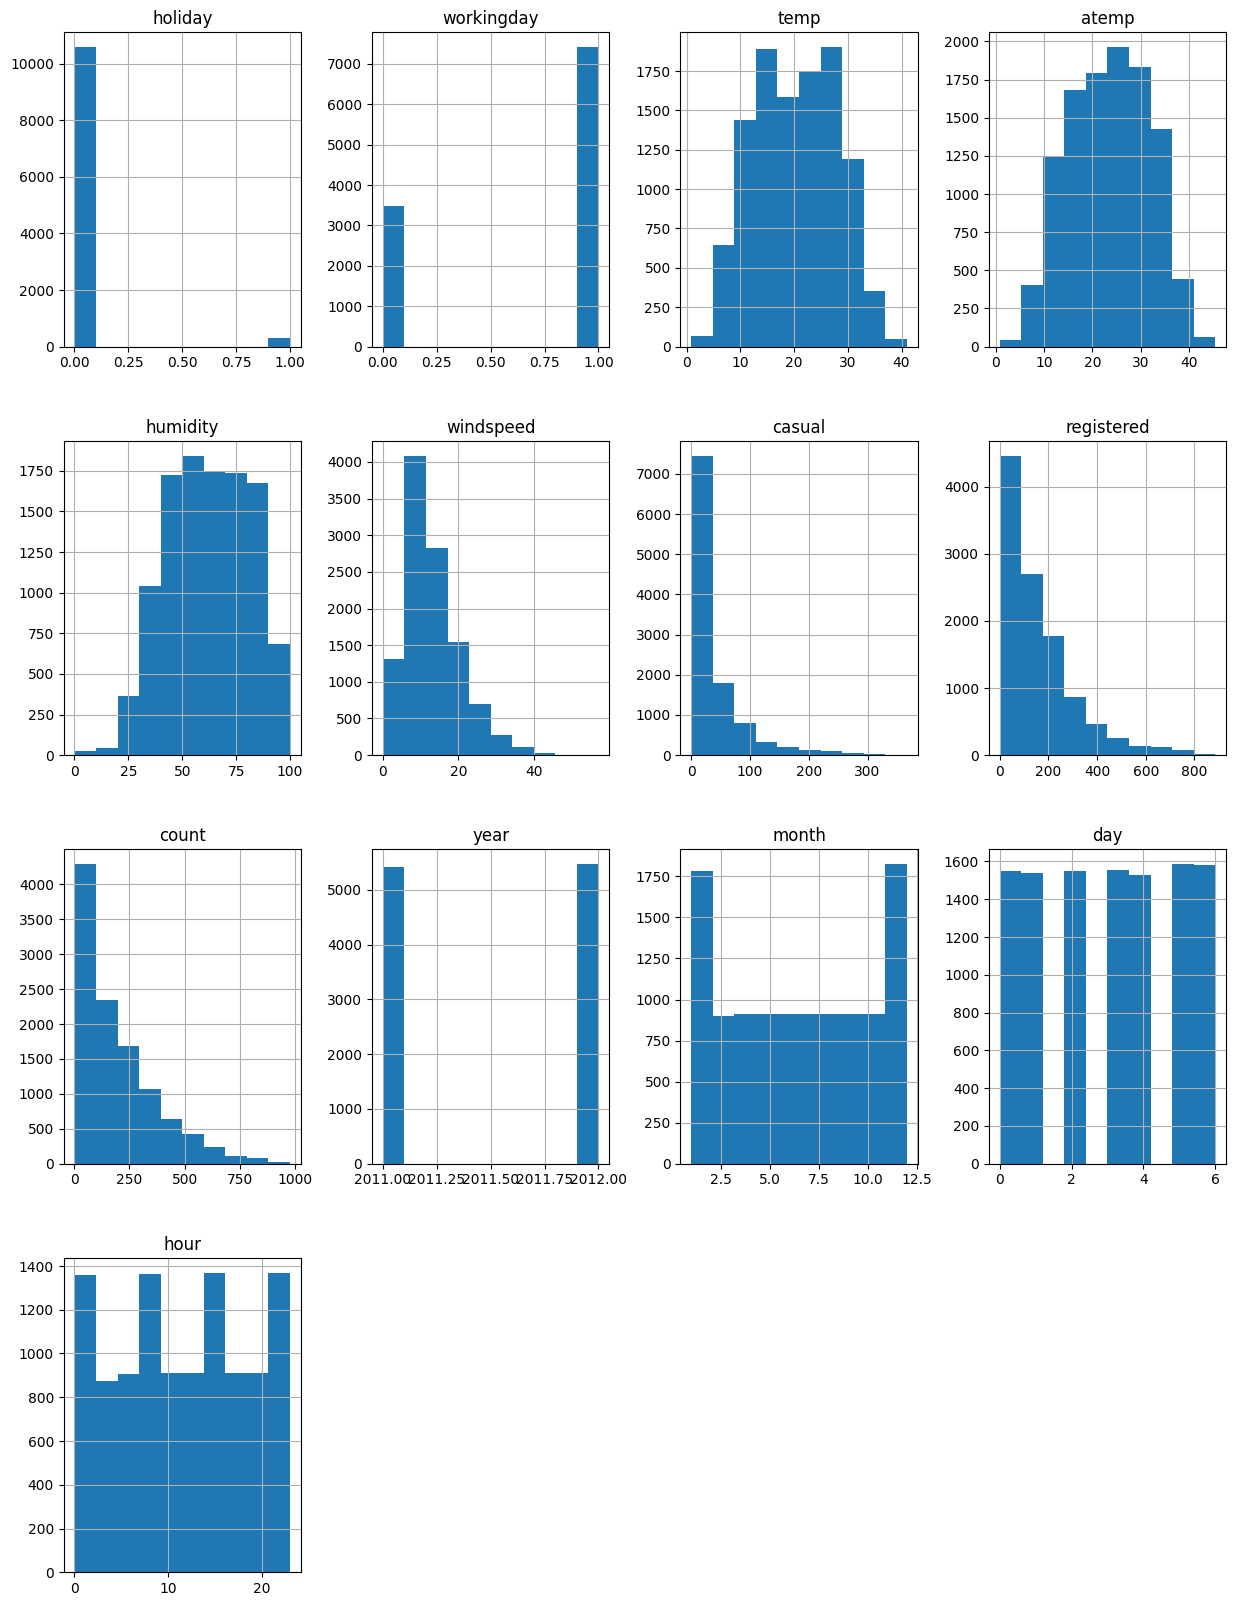

In [ ]:
# View histogram of all features again now with the hour feature
train.hist(figsize=(15,20))

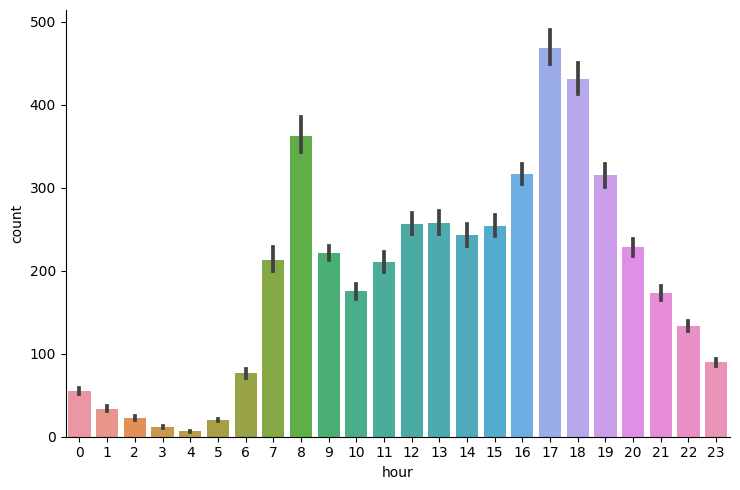

In [ ]:
# Variation in`count` w.r.t `hour`

# Using catplot: 'kind':bar makes sure to take value of 'count' for every record into account
sb.catplot(x="hour",y="count",data=train,kind='bar',height=5,aspect=1.5)
plt.tight_layout()
plt.show()

Observations:

Frequency of Bike Rides (Hourly-basis):

*   High: From 7-9 (7am - 9am) and 16-19 (4pm - 7pm)
*   Moderate: 10-15 (10am - 3pm)
*   Low: 0-6 (12am - 6am) and 20-24 (8pm - 12am)

This makes sense as most people who rent these bikes could potentially be young college students or working professionals, who actively commute via some means of transport during peak hours of the day mentioned under the High category.

Since bike rental is one of the cheapest option, this could be the reason for the indicated surge in rental counts during peak hours of the day.

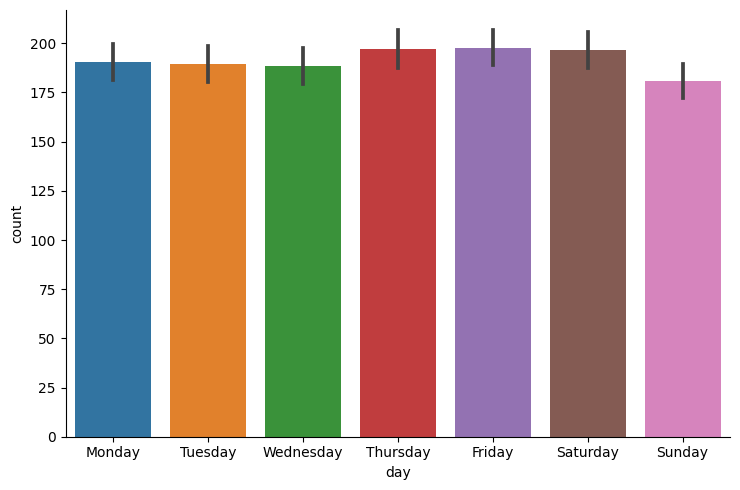

In [ ]:
# Variation in`count` w.r.t `day` (dayofweek) [0: Monday -> 6: Sunday]

# Using catplot: 'kind':bar makes sure to take value of 'count' for every record into account
sb.catplot(x="day",y="count",data=train,kind='bar',height=5,aspect=1.5)
plt.tight_layout()
plt.xticks(ticks=range(0,7), labels=["Monday", "Tuesday", "Wednesday",
                                     "Thursday", "Friday", "Saturday", "Sunday"])
plt.show()


Observation:

Not much variation or pattern is seen in the bike rental counts with respect to featureday.

However, the demand for bike rentals seem to be slightly more on Thursdays, Fridays and Saturdays

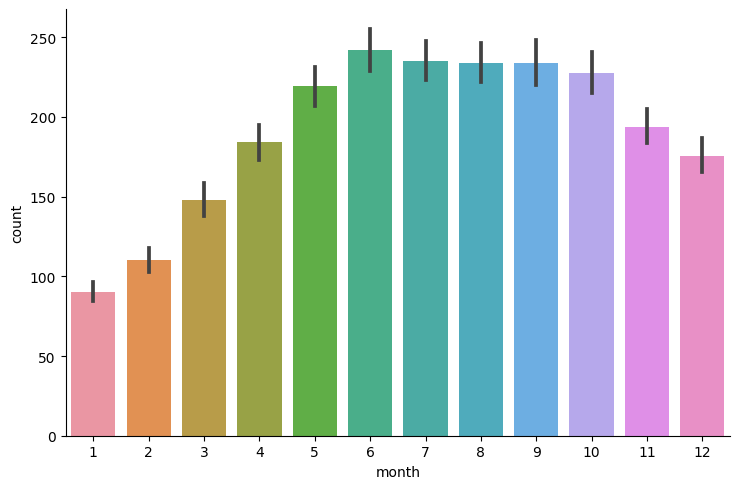

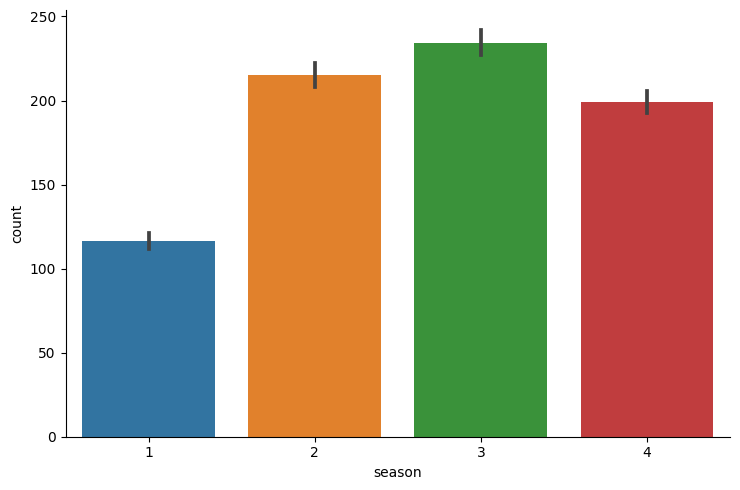

In [ ]:
# Variation in`count` w.r.t `month` and 'season'

# Using catplot: 'kind':bar makes sure to take value of 'count' for every record into account
sb.catplot(x="month",y="count",data=train,kind='bar',height=5,aspect=1.5)
sb.catplot(x="season",y="count",data=train,kind='bar',height=5,aspect=1.5)
plt.tight_layout()
plt.show()

Observation:

Since seasons show variation in the number of bike rentals count, it is obvious to notice the same from the month feature, but at a slightly more granular level.

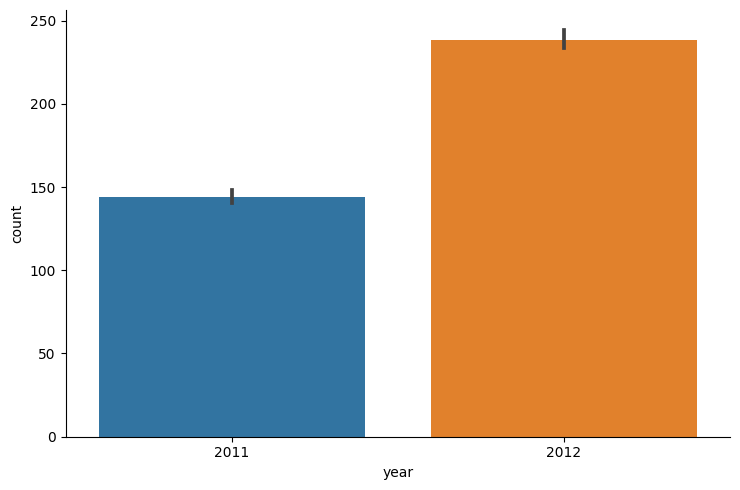

In [ ]:
# Variation in`count` w.r.t `year`

# Using catplot: 'kind':bar makes sure to take value of 'count' for every record into account
sb.catplot(x="year",y="count",data=train,kind='bar',height=5,aspect=1.5)
plt.tight_layout()
plt.show()

Year 2012 has higher bike demand as compared to 2011.

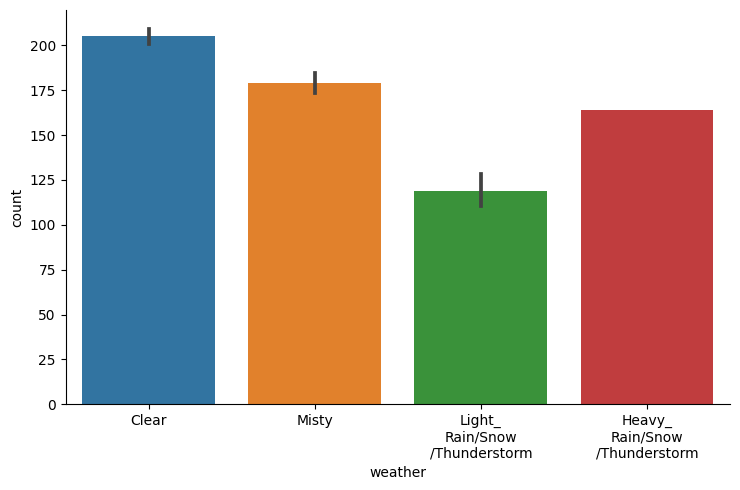

In [ ]:
# Variation in`count` w.r.t `weather'

# Using catplot: 'kind':bar makes sure to take value of 'count' for every record into account
sb.catplot(x="weather",y="count",data=train,kind='bar',height=5,aspect=1.5)
plt.xticks(ticks=range(0,4), labels=["Clear","Misty",
                                     "Light_\nRain/Snow\n/Thunderstorm",
                                     "Heavy_\nRain/Snow\n/Thunderstorm"])
plt.tight_layout()
plt.show()

Bike rental counts are highest in Clear weather, followed by Misty weather.

# **Creating a new feature 'day_type'**

We know that in the given data,

holiday - whether the day is considered a holiday (0: Non-holiday, 1: Holiday)

workingday - whether the day is neither a weekend nor holiday (0: Can-be-a-weekend-or-holiday, 1: No-weekend-No-holiday)

In [ ]:
# New feature 'day_type' contains categories 'weekend', 'weekday', or 'holiday' (In Train and Test set)

# Adding features - 'day_type' in train data
train["day_type"]=""
train.loc[(train.holiday==1),"day_type"] = "holiday"
train.loc[((train.holiday==0) & (train.workingday==1)), "day_type"] = "weekday"
train.loc[((train.holiday==0) & (train.workingday==0)), "day_type"] = "weekend"

# Adding features - 'day_type' in test data
test["day_type"]=""
test.loc[(test.holiday==1),"day_type"] = "holiday"
test.loc[((test.holiday==0) & (test.workingday==1)), "day_type"] = "weekday"
test.loc[((test.holiday==0) & (test.workingday==0)), "day_type"] = "weekend"

# Change the datatype to category
train["day_type"] = train["day_type"].astype("category")
test["day_type"] = test["day_type"].astype("category")

train.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,day_type
0,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,5,0,weekend
1,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,5,1,weekend
2,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,5,2,weekend
3,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,5,3,weekend
4,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,5,4,weekend


Observation:

New categorical feature day_type added with the following categories.

'holiday': when holiday is set to 1

'weekday': when holiday is set to 0 and workingday is set to 1

'weekend': when holiday is set to 0 and workingday is set to 0

In [ ]:
train.describe()

,holiday,workingday,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour
count,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,0.028569,0.680875,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132,2011.501929,6.521495,3.013963,11.541613
std,0.166599,0.466159,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454,0.500019,3.444373,2.004585,6.915838
min,0.000000,0.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000,2011.000000,1.000000,0.000000,0.000000
25%,0.000000,0.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000,2011.000000,4.000000,1.000000,6.000000
50%,0.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000,2012.000000,7.000000,3.000000,12.000000
75%,0.000000,1.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000,2012.000000,10.000000,5.000000,18.000000
max,1.000000,1.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000,2012.000000,12.000000,6.000000,23.000000


Observations:

All the other aforementioned features have similar nature in the plots

New feature year shows that the historical data is for years 2011 and 2012 respectively.

Historical data of all 12 months within a year is considered in this train dataset.

Days from (at the earliest - 1st) to (at the maximum - 19th) of every month are taken into account in the train dataset

Hourly information of all busy hours within 24 hours of a day is mentioned in this dataset

In [ ]:
# Dropping highly correlated independent feature 'atemp' from train and test datasets
train.drop(["atemp"], axis=1, inplace=True)
test.drop(["atemp"], axis=1, inplace=True)

In [ ]:
# Checking datatypes of variables
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      10886 non-null  category
 1   holiday     10886 non-null  int64   
 2   workingday  10886 non-null  int64   
 3   weather     10886 non-null  category
 4   temp        10886 non-null  float64 
 5   humidity    10886 non-null  int64   
 6   windspeed   10886 non-null  float64 
 7   casual      10886 non-null  int64   
 8   registered  10886 non-null  int64   
 9   count       10886 non-null  int64   
 10  year        10886 non-null  int64   
 11  month       10886 non-null  int64   
 12  day         10886 non-null  int64   
 13  hour        10886 non-null  int64   
 14  day_type    10886 non-null  category
dtypes: category(3), float64(2), int64(10)
memory usage: 1.0 MB


In [ ]:
print("(After EDA + Feature Engineering) Train Data Shape : ", train.shape)
print("(After EDA + Feature Engineering) Test Data Shape  : ", test.shape)

(After EDA + Feature Engineering) Train Data Shape :  (10886, 15)
(After EDA + Feature Engineering) Test Data Shape  :  (6493, 12)


<ipython-input-50-e40151afd703>:9: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix1 = corr_data[feature_numeric].corr()


<Figure size 1800x1800 with 0 Axes>

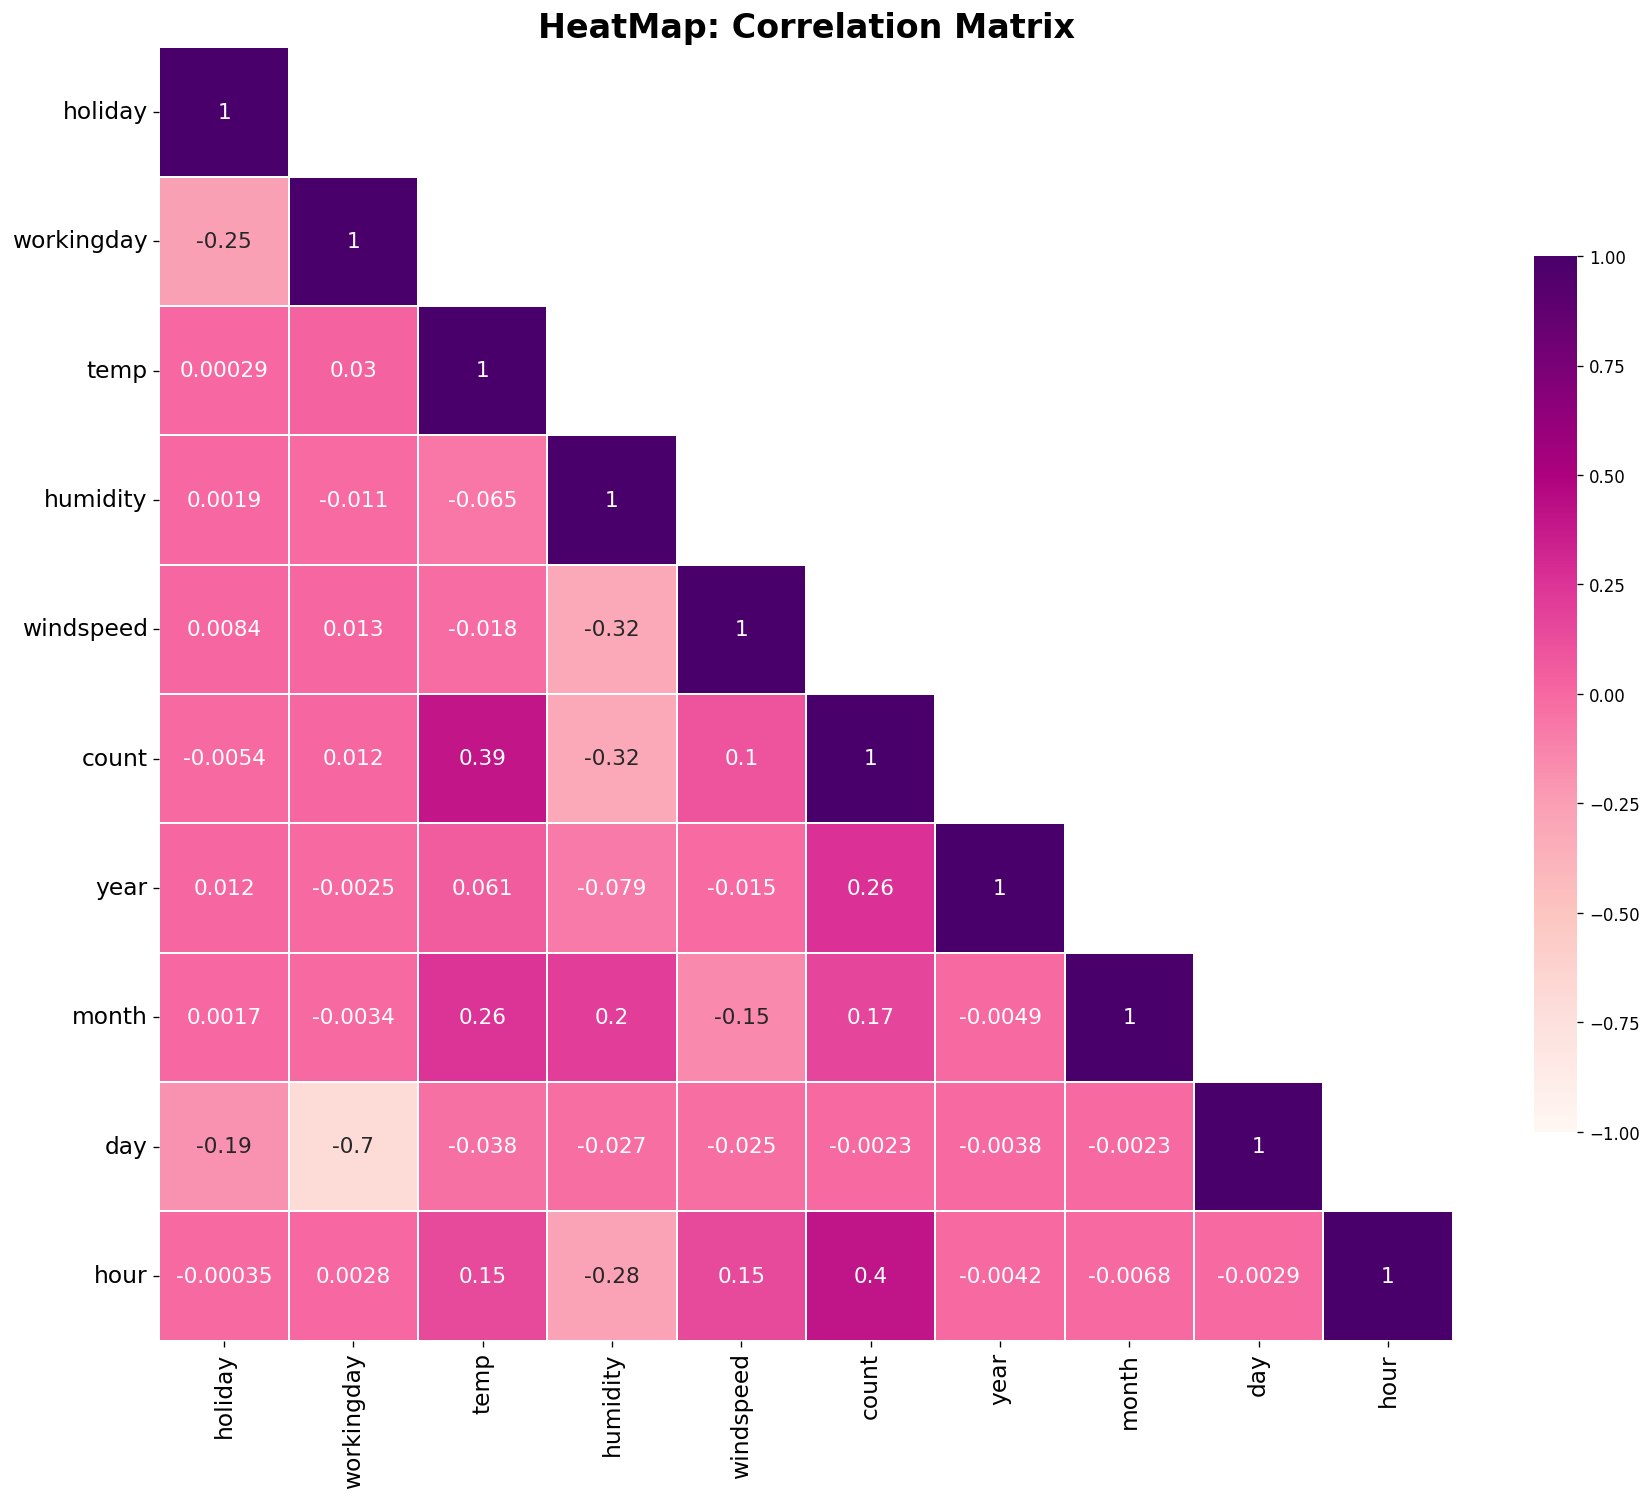

In [ ]:
## Let's check the correlation between these variables to see if there is pattern between variables
# Recheck: Plotting a heatmap to understand the correlation between the independent variables

# Ignoring 'casual' and 'registered' features
import seaborn as sns
feature_numeric = [i for i in train.columns if i not in ['casual', 'registered']]
plt.figure(figsize = (15,15), dpi=120)
corr_data = train.copy()
corr_matrix1 = corr_data[feature_numeric].corr()

f, ax_corr1 = plt.subplots(figsize=(15, 15), dpi=120)
# Create a mask to eliminate redundant repetitive correlations
corr_mask = np.array(corr_matrix1)
corr_mask[np.tril_indices_from(corr_mask)] = False

# Plot heatmap using correlation matrix and mask
ax_corr1 = sns.heatmap(corr_matrix1, cmap= 'RdPu', cbar_kws={"shrink": .5}, vmin= -1, vmax=1, center=0,
            square=True, mask=corr_mask, annot=True, linewidths=0.01, annot_kws={"size":13})
plt.xticks(fontsize=14, rotation=90)
plt.yticks(fontsize=14, rotation=0)
plt.title("HeatMap: Correlation Matrix", fontsize=20, fontweight='bold')
plt.tight_layout()
plt.autoscale()
plt.show()

## Step 5: Rerun the model with the same settings as before, just with more features

In [ ]:
# Requirements: (Same settings as that of initial run) For AutoGluon's Tabular Predictions
eval_metric = 'root_mean_squared_error'
label = 'count'
ignored_columns = ["casual", "registered"]   # Ignored columns while training
train_data = train                           # 'casual' and 'registered' columns are already dropped/ignored
time_limit = 600                             # 10 minutes -> 60*10 = 600 seconds
presets = "best_quality"                     # auto_stack=True

In [ ]:
predictor_new_features = TabularPredictor(label='count' , eval_metric='rmse', problem_type='regression').fit(train_data=train.drop(['casual' , 'registered'], axis=1), time_limit=600, presets="best_quality")

No path specified. Models will be saved in: "AutogluonModels/ag-20230528_101925/"
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=20
Beginning AutoGluon training ... Time limit = 600s
AutoGluon will save models to "AutogluonModels/ag-20230528_101925/"
AutoGluon Version:  0.7.0
Python Version:     3.10.11
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP Sat Apr 29 09:15:28 UTC 2023
Train Data Rows:    10886
Train Data Columns: 12
Label Column: count
Preprocessing data ...
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    10648.59 MB
	Train Data (Original)  Memory Usage: 0.82 MB (0.0% of available memory)
	Inferring data type of each feature based on column values. Set feature_metadata_in to manually specify special dtypes of the features.
	Stage 1 Generators:
		Fitting AsTypeFeatureGenerator...
			No

In [ ]:
predictor_new_features.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                     model   score_val  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0      WeightedEnsemble_L3  -34.260888      39.498491  562.700354                0.001378           0.475830            3       True         13
1      WeightedEnsemble_L2  -34.303309      37.334614  372.677026                0.001255           0.721184            2       True          8
2          CatBoost_BAG_L2  -34.349501      37.975485  452.023577                0.250371          79.975155            2       True         12
3          LightGBM_BAG_L2  -34.896381      37.978415  403.913141                0.253300          31.864718            2       True         10
4        LightGBMXT_BAG_L2  -35.159156      38.270269  406.579132                0.545155          34.530710            2       True          9
5   RandomForestMSE_BAG_L2  -35.165752      38.448287  415.853942         

/usr/local/lib/python3.10/dist-packages/autogluon/core/utils/plots.py:138: UserWarning: AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"
  warnings.warn('AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"')


{'model_types': {'KNeighborsUnif_BAG_L1': 'StackerEnsembleModel_KNN',
  'KNeighborsDist_BAG_L1': 'StackerEnsembleModel_KNN',
  'LightGBMXT_BAG_L1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L1': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L1': 'StackerEnsembleModel_CatBoost',
  'ExtraTreesMSE_BAG_L1': 'StackerEnsembleModel_XT',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'LightGBMXT_BAG_L2': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L2': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L2': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L2': 'StackerEnsembleModel_CatBoost',
  'WeightedEnsemble_L3': 'WeightedEnsembleModel'},
 'model_performance': {'KNeighborsUnif_BAG_L1': -113.26164315463612,
  'KNeighborsDist_BAG_L1': -109.84517207130654,
  'LightGBMXT_BAG_L1': -36.7080198842608,
  'LightGBM_BAG_L1': -35.78035548163389,
  'RandomForestMSE_BAG_L1': -39.71723944004303,
  'CatBoost_BAG_L1': -37.07580362754405,
  'ExtraTreesM

In [ ]:
predictor_new_features.leaderboard()

                     model   score_val  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0      WeightedEnsemble_L3  -34.260888      39.498491  562.700354                0.001378           0.475830            3       True         13
1      WeightedEnsemble_L2  -34.303309      37.334614  372.677026                0.001255           0.721184            2       True          8
2          CatBoost_BAG_L2  -34.349501      37.975485  452.023577                0.250371          79.975155            2       True         12
3          LightGBM_BAG_L2  -34.896381      37.978415  403.913141                0.253300          31.864718            2       True         10
4        LightGBMXT_BAG_L2  -35.159156      38.270269  406.579132                0.545155          34.530710            2       True          9
5   RandomForestMSE_BAG_L2  -35.165752      38.448287  415.853942                0.723173          43.805520            2       True    

,model,score_val,pred_time_val,fit_time,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,WeightedEnsemble_L3,-34.260888,39.498491,562.700354,0.001378,0.475830,3,True,13
1,WeightedEnsemble_L2,-34.303309,37.334614,372.677026,0.001255,0.721184,2,True,8
2,CatBoost_BAG_L2,-34.349501,37.975485,452.023577,0.250371,79.975155,2,True,12
3,LightGBM_BAG_L2,-34.896381,37.978415,403.913141,0.253300,31.864718,2,True,10
4,LightGBMXT_BAG_L2,-35.159156,38.270269,406.579132,0.545155,34.530710,2,True,9
5,RandomForestMSE_BAG_L2,-35.165752,38.448287,415.853942,0.723173,43.805520,2,True,11
6,LightGBM_BAG_L1,-35.780355,4.856430,62.416599,4.856430,62.416599,1,True,4
7,LightGBMXT_BAG_L1,-36.708020,30.436774,118.705122,30.436774,118.705122,1,True,3
8,CatBoost_BAG_L1,-37.075804,0.480262,167.522547,0.480262,167.522547,1,True,6
9,ExtraTreesMSE_BAG_L1,-38.580226,0.941263,10.375779,0.941263,10.375779,1,True,7


                     model   score_val  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0      WeightedEnsemble_L3  -34.260888      39.498491  562.700354                0.001378           0.475830            3       True         13
1      WeightedEnsemble_L2  -34.303309      37.334614  372.677026                0.001255           0.721184            2       True          8
2          CatBoost_BAG_L2  -34.349501      37.975485  452.023577                0.250371          79.975155            2       True         12
3          LightGBM_BAG_L2  -34.896381      37.978415  403.913141                0.253300          31.864718            2       True         10
4        LightGBMXT_BAG_L2  -35.159156      38.270269  406.579132                0.545155          34.530710            2       True          9
5   RandomForestMSE_BAG_L2  -35.165752      38.448287  415.853942                0.723173          43.805520            2       True    

<Axes: xlabel='model'>

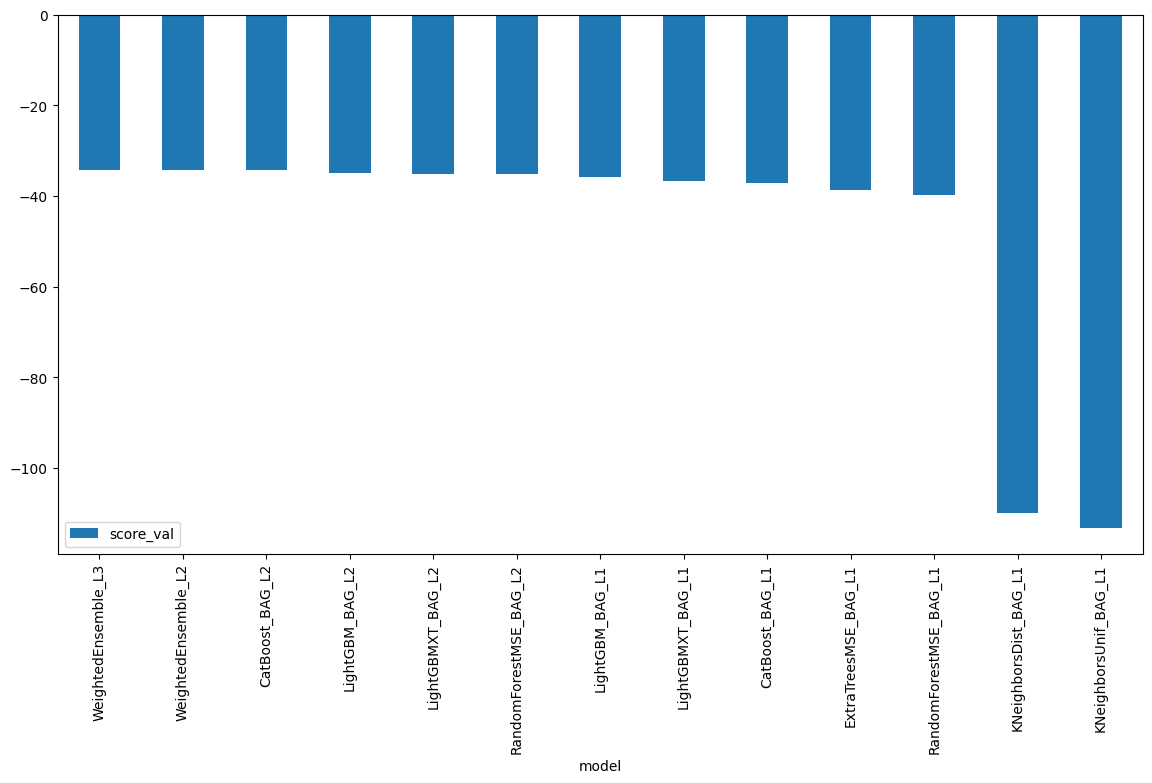

In [ ]:
predictor_new_features.leaderboard().plot(kind="bar", x="model", y="score_val", figsize=(14, 7))

In [ ]:
predictions_new_features = predictor_new_features.predict(test)
predictions_new_features.head()

0    11.827034
1     6.215607
2     5.197810
3     4.290312
4     4.348459
Name: count, dtype: float32

In [ ]:
# Describe the `predictions_new_features` series to see if there are any negative values
predictions_new_features.describe()

count    6493.000000
mean      189.992340
std       174.925934
min         2.173538
25%        44.058907
50%       148.303741
75%       282.466431
max       885.687012
Name: count, dtype: float64

In [ ]:
# How many negative values do we have?

# Rechecking the predictions in predictions_new_features
negative_pred_count = predictions_new_features.apply(lambda x: 1 if x<0 else 0)

pred_pos_count = (negative_pred_count==0).sum()
pred_neg_count = (negative_pred_count==1).sum()

print("Total predictions                :", len(predictions_new_features.index))
print("Total positive prediction values :", pred_pos_count)
print("Total negative prediction values :", pred_neg_count)

Total predictions                : 6493
Total positive prediction values : 6493
Total negative prediction values : 0


In [ ]:
# Remember to set all negative values to zero
predictions_new_features[predictions_new_features<0] = 0    # (In case, if negative values exist in the predictions_new_features, set them to 0)

# Rechecking, if no predictions are less than 0
negative_pred_count = predictions_new_features.apply(lambda x: 1 if x<0 else 0)
pred_neg_count = (negative_pred_count==1).sum()
print(f"No. of negative predictions: {pred_neg_count}")
print("All negative values in the predictions (if any) are set to zero successfully.")

No. of negative predictions: 0
All negative values in the predictions (if any) are set to zero successfully.


In [ ]:
# Same thing as train and test dataset
submission_new_features = pd.read_csv('sampleSubmission.csv', parse_dates = ['datetime'])
submission_new_features.head()

,datetime,count
0,2011-01-20 00:00:00,0
1,2011-01-20 01:00:00,0
2,2011-01-20 02:00:00,0
3,2011-01-20 03:00:00,0
4,2011-01-20 04:00:00,0


In [ ]:
# Same submitting predictions
submission_new_features["count"] = predictions_new_features
submission_new_features.to_csv("submission_new_features.csv", index=False)
submission_new_features.head()

,datetime,count
0,2011-01-20 00:00:00,11.827034
1,2011-01-20 01:00:00,6.215607
2,2011-01-20 02:00:00,5.197810
3,2011-01-20 03:00:00,4.290312
4,2011-01-20 04:00:00,4.348459


In [ ]:
!kaggle competitions submit -c bike-sharing-demand -f submission_new_features.csv -m "new features"

100% 188k/188k [00:00<00:00, 1.02MB/s]
Successfully submitted to Bike Sharing Demand

In [ ]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

fileName                     date                 description           status    publicScore  privateScore  
---------------------------  -------------------  --------------------  --------  -----------  ------------  
submission_new_features.csv  2023-05-28 10:44:54  new features          complete  0.44956      0.44956       
submission.csv               2023-05-28 09:38:25  first raw submission  complete  1.80520      1.80520       
submission.csv               2023-05-28 08:50:43  first raw submission  complete  1.80552      1.80552       


#### New Score of `0.44956 `

## Step 6: Hyper parameter optimization
* There are many options for hyper parameter optimization.
* Options are to change the AutoGluon higher level parameters or the individual model hyperparameters.
* The hyperparameters of the models themselves that are in AutoGluon. Those need the `hyperparameter` and `hyperparameter_tune_kwargs` arguments.

In [ ]:
# Requirements: (Same settings as initial run) For AutoGluon's Tabular Predictions
eval_metric = 'root_mean_squared_error'
label = 'count'
ignored_columns = ["casual", "registered"]   # Ignored columns while training
train_data = train                           # 'casual' and 'registered' columns are already dropped/ignored
time_limit = 600                             # 10 minutes -> 60*10 = 600 seconds
presets = "optimize_for_deployment"

In [ ]:
import autogluon.core as ag
## From autogluon documentation

nn_options = {'num_epochs': 5,
              'learning_rate': ag.space.Real(1e-4, 1e-2, default=5e-4, log=True),
                    # learning rate used in training (real-valued hyperparameter searched on log-scale)
              'activation': ag.space.Categorical('relu', 'softrelu', 'tanh'),
                    # activation function used in NN (categorical hyperparameter, default = first entry)
              'dropout_prob': ag.space.Real(0.0, 0.5, default=0.1)}

gbm_options = [{'extra_trees': True,
                'num_boost_round': ag.space.Int(lower=100, upper=500, default=100),
                'num_leaves': ag.space.Int(lower=25, upper=64, default=36),
                'ag_args': {'name_suffix': 'XT'}}, {}, 'GBMLarge']

hyperparameters = {  # hyperparameters of each model type
                   'GBM': gbm_options,
                   'NN_TORCH': nn_options,
                  }

num_trials = 20            # Number of hyperparameter optimization trials you want to perform
search_strategy = 'auto'  # tune hyperparameters using Bayesian optimization routine with a local scheduler
scheduler = 'local'       # Local FIFO scheduler

hyperparameter_tune_kwargs = {
    'num_trials': num_trials,
    'scheduler' : scheduler,
    'searcher': search_strategy,
}

predictor_new_hpo = TabularPredictor(label='count', problem_type='regression', eval_metric='root_mean_squared_error',
                                    learner_kwargs={'ignored_columns': ignored_columns}).fit(
                                                                         train_data=train,
                                                                         time_limit=time_limit,
                                                                         presets=presets,
                                                                         hyperparameters=hyperparameters,
                                                                         hyperparameter_tune_kwargs=hyperparameter_tune_kwargs,
                                                                         refit_full='best')


Fitted model: NeuralNetTorch/f6367f2c ...
	-115.3105	 = Validation score   (-root_mean_squared_error)
	6.77s	 = Training   runtime
	0.03s	 = Validation runtime
Fitted model: NeuralNetTorch/68146a22 ...
	-141.5096	 = Validation score   (-root_mean_squared_error)
	8.74s	 = Training   runtime
	0.07s	 = Validation runtime
Fitted model: NeuralNetTorch/7158da8b ...
	-146.1483	 = Validation score   (-root_mean_squared_error)
	7.57s	 = Training   runtime
	0.07s	 = Validation runtime
Fitted model: NeuralNetTorch/e6298ce5 ...
	-150.789	 = Validation score   (-root_mean_squared_error)
	20.22s	 = Training   runtime
	0.14s	 = Validation runtime
Fitted model: NeuralNetTorch/cea582b0 ...
	-142.9665	 = Validation score   (-root_mean_squared_error)
	6.37s	 = Training   runtime
	0.06s	 = Validation runtime
Fitted model: NeuralNetTorch/d57dd54a ...
	-106.6744	 = Validation score   (-root_mean_squared_error)
	5.01s	 = Training   runtime
	0.04s	 = Validation runtime
Fitted model: NeuralNetTorch/cb0b0369 ..

In [ ]:
predictor_new_hpo.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                     model  score_val  pred_time_val   fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0      WeightedEnsemble_L2 -37.622232       7.672721  53.668308                0.001290           0.755413            2       True          6
1              LightGBM/T4 -38.124006       3.226732  15.737828                3.226732          15.737828            1       True          1
2             LightGBM/T13 -38.369670       1.207577   9.069551                1.207577           9.069551            1       True          3
3             LightGBM/T12 -38.431862       2.405685  13.558131                2.405685          13.558131            1       True          2
4            LightGBMLarge -38.516436       0.694972   7.023361                0.694972           7.023361            1       True          5
5  NeuralNetTorch/cb0b0369 -63.825104       0.136465   7.524023                0.13646

/usr/local/lib/python3.10/dist-packages/autogluon/core/utils/plots.py:138: UserWarning: AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"
  warnings.warn('AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"')


{'model_types': {'LightGBM/T4': 'LGBModel',
  'LightGBM/T12': 'LGBModel',
  'LightGBM/T13': 'LGBModel',
  'NeuralNetTorch/cb0b0369': 'TabularNeuralNetTorchModel',
  'LightGBMLarge': 'LGBModel',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel'},
 'model_performance': {'LightGBM/T4': -38.12400606130618,
  'LightGBM/T12': -38.431861570431245,
  'LightGBM/T13': -38.3696701247306,
  'NeuralNetTorch/cb0b0369': -63.825103906026925,
  'LightGBMLarge': -38.51643622165731,
  'WeightedEnsemble_L2': -37.62223205964976},
 'model_best': 'WeightedEnsemble_L2',
 'model_paths': {'LightGBM/T4': '/content/AutogluonModels/ag-20230528_104827/models/LightGBM/T4/',
  'LightGBM/T12': '/content/AutogluonModels/ag-20230528_104827/models/LightGBM/T12/',
  'LightGBM/T13': '/content/AutogluonModels/ag-20230528_104827/models/LightGBM/T13/',
  'NeuralNetTorch/cb0b0369': '/content/AutogluonModels/ag-20230528_104827/models/NeuralNetTorch/cb0b0369/',
  'LightGBMLarge': 'AutogluonModels/ag-20230528_104827/models/LightGB

In [ ]:
predictor_new_hpo.leaderboard()

                     model  score_val  pred_time_val   fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0      WeightedEnsemble_L2 -37.622232       7.672721  53.668308                0.001290           0.755413            2       True          6
1              LightGBM/T4 -38.124006       3.226732  15.737828                3.226732          15.737828            1       True          1
2             LightGBM/T13 -38.369670       1.207577   9.069551                1.207577           9.069551            1       True          3
3             LightGBM/T12 -38.431862       2.405685  13.558131                2.405685          13.558131            1       True          2
4            LightGBMLarge -38.516436       0.694972   7.023361                0.694972           7.023361            1       True          5
5  NeuralNetTorch/cb0b0369 -63.825104       0.136465   7.524023                0.136465           7.524023            1       True          4


,model,score_val,pred_time_val,fit_time,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,WeightedEnsemble_L2,-37.622232,7.672721,53.668308,0.001290,0.755413,2,True,6
1,LightGBM/T4,-38.124006,3.226732,15.737828,3.226732,15.737828,1,True,1
2,LightGBM/T13,-38.369670,1.207577,9.069551,1.207577,9.069551,1,True,3
3,LightGBM/T12,-38.431862,2.405685,13.558131,2.405685,13.558131,1,True,2
4,LightGBMLarge,-38.516436,0.694972,7.023361,0.694972,7.023361,1,True,5
5,NeuralNetTorch/cb0b0369,-63.825104,0.136465,7.524023,0.136465,7.524023,1,True,4


                     model  score_val  pred_time_val   fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0      WeightedEnsemble_L2 -37.622232       7.672721  53.668308                0.001290           0.755413            2       True          6
1              LightGBM/T4 -38.124006       3.226732  15.737828                3.226732          15.737828            1       True          1
2             LightGBM/T13 -38.369670       1.207577   9.069551                1.207577           9.069551            1       True          3
3             LightGBM/T12 -38.431862       2.405685  13.558131                2.405685          13.558131            1       True          2
4            LightGBMLarge -38.516436       0.694972   7.023361                0.694972           7.023361            1       True          5
5  NeuralNetTorch/cb0b0369 -63.825104       0.136465   7.524023                0.136465           7.524023            1       True          4


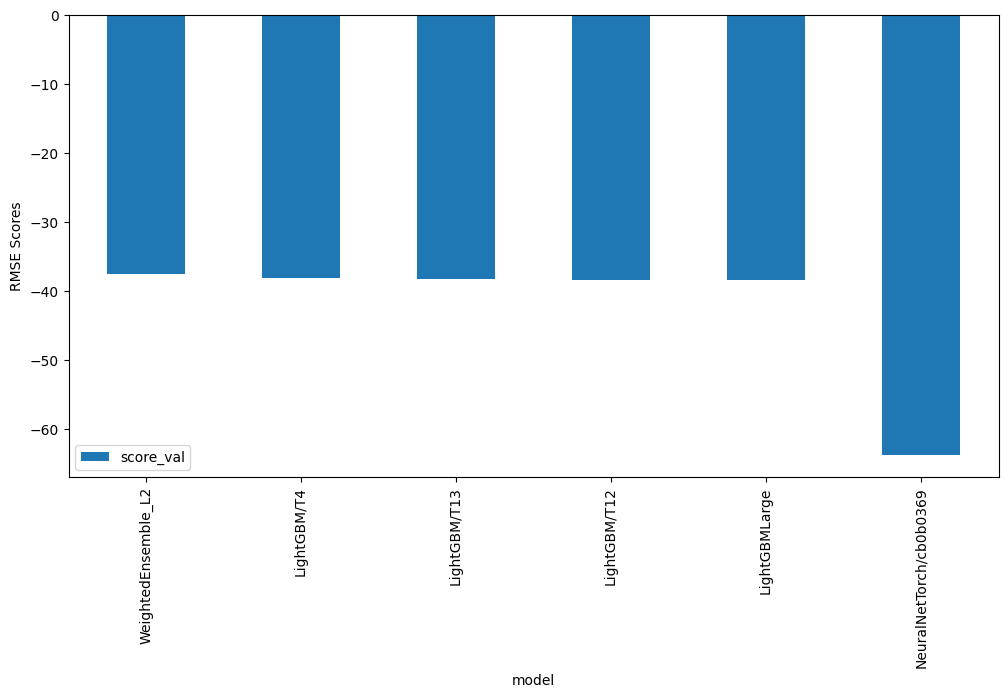

In [ ]:
# Output the model's `score_val` in a bar chart to compare performance
import matplotlib.pyplot as plt
predictor_new_hpo.leaderboard().plot(kind="bar", x="model", y="score_val", figsize=(12, 6))
plt.ylabel("RMSE Scores")
plt.show()

In [ ]:
predictions_new_hpo = predictor_new_hpo.predict(test)
predictions_new_hpo.head()

0    17.042290
1     2.736429
2     0.310958
3     0.677150
4     0.697125
Name: count, dtype: float32

In [ ]:
# Describe the `predictions_new_hpo` series to see if there are any negative values
predictions_new_hpo.describe()

count    6493.000000
mean      190.035110
std       173.922516
min       -19.203064
25%        45.833160
50%       147.955322
75%       284.720123
max       931.766479
Name: count, dtype: float64

In [ ]:
# How many negative values do we have?

# Rechecking the predictions in predictions_new_hpo
negative_pred_count = predictions_new_hpo.apply(lambda x: 1 if x<0 else 0)

pred_pos_count = (negative_pred_count==0).sum()
pred_neg_count = (negative_pred_count==1).sum()

print("Total predictions                :", len(predictions_new_hpo.index))
print("Total positive prediction values :", pred_pos_count)
print("Total negative prediction values :", pred_neg_count)

Total predictions                : 6493
Total positive prediction values : 6412
Total negative prediction values : 81


In [ ]:
# Remember to set all negative values to zero
predictions_new_hpo[predictions_new_hpo<0] = 0    # (In case, if negative values exist in the predictions_new_hpo, set them to 0)

# Rechecking, if no predictions are less than 0
negative_pred_count = predictions_new_hpo.apply(lambda x: 1 if x<0 else 0)
pred_neg_count = (negative_pred_count==1).sum()
print(f"No. of negative predictions: {pred_neg_count}")
print("All negative values in the predictions (if any) are set to zero successfully.")


No. of negative predictions: 0
All negative values in the predictions (if any) are set to zero successfully.


In [ ]:
# Same thing as train and test dataset
submission_new_hpo = pd.read_csv('sampleSubmission.csv', parse_dates = ['datetime'])
submission_new_hpo.head()

,datetime,count
0,2011-01-20 00:00:00,0
1,2011-01-20 01:00:00,0
2,2011-01-20 02:00:00,0
3,2011-01-20 03:00:00,0
4,2011-01-20 04:00:00,0


In [ ]:
# Same submitting predictions
submission_new_hpo["count"] = predictions_new_hpo
submission_new_hpo.to_csv("submission_new_hpo.csv", index=False)

In [ ]:
!kaggle competitions submit -c bike-sharing-demand -f submission_new_hpo.csv -m "new features with hyperparameters"

100% 188k/188k [00:00<00:00, 885kB/s]
Successfully submitted to Bike Sharing Demand

In [ ]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

fileName                     date                 description                        status    publicScore  privateScore  
---------------------------  -------------------  ---------------------------------  --------  -----------  ------------  
submission_new_hpo.csv       2023-05-28 11:11:02  new features with hyperparameters  complete  0.52785      0.52785       
submission_new_features.csv  2023-05-28 10:44:54  new features                       complete  0.44956      0.44956       
submission.csv               2023-05-28 09:38:25  first raw submission               complete  1.80520      1.80520       
submission.csv               2023-05-28 08:50:43  first raw submission               complete  1.80552      1.80552       


#### New Score of `0.52785`

## Step 6_A: Hyper parameter optimization

In [ ]:
# Requirements: (Same settings as initial run) For AutoGluon's Tabular Predictions
eval_metric = 'root_mean_squared_error'
label = 'count'
ignored_columns = ["casual", "registered"]   # Ignored columns while training
train_data = train                           # 'casual' and 'registered' columns are already dropped/ignored
time_limit = 600                             # 10 minutes -> 600 seconds
presets = "optimize_for_deployment"          # Lighter preset options (faster)

In [ ]:
import autogluon.core as ag
## From autogluon documentation:

# Exclude ['NN_TORCH'] family of models
excluded_model_types = ['NN_TORCH']


# Considering GBM, XT and XGB model types (as these along with WeightedEnsembles have shown good results)
# For GBM
gbm_options = [{'extra_trees': True,
                'num_boost_round': ag.space.Int(lower=100, upper=800, default=100),
                'num_leaves': ag.space.Int(lower=26, upper=66, default=36),  # number of leaves in trees (integer hyperparameter)
                'ag_args': {'name_suffix': 'XT'}}, {}, 'GBMLarge']

# XT Models
xt_options = {'criterion': 'squared_error', 'ag_args': {'name_suffix': 'MSE', 'problem_types': ['regression']}}

# XGB Models
xgb_options = [{'objective': 'reg:squarederror', # 'reg:linear' is deprecated
                'eval_metric': 'rmse',
                'max_depth':ag.space.Int(lower=5, upper=8, default=6),
                'n_estimators': ag.space.Int(lower=100, upper=500, default=100),
                'eta':.3,
                'subsample': 1,
                'colsample_bytree': 1}]

hyperparameters = {  # hyperparameters of each model type
                   'GBM': gbm_options,
                   'XT': xt_options,
                   'XGB': xgb_options
                  }

num_trials = 20            # Number of hyperparameter optimization trials you want to perform
search_strategy = 'auto'  # tune hyperparameters using Bayesian optimization routine with a local scheduler
scheduler = 'local'       # Local FIFO scheduler

hyperparameter_tune_kwargs = {
                            'num_trials': num_trials,
                            'scheduler' : scheduler,
                            'searcher': search_strategy,
                        }

predictor_new_hpo1 = TabularPredictor(label='count', problem_type='regression', eval_metric='root_mean_squared_error',
                                    learner_kwargs={'ignored_columns': ignored_columns}).fit(
                                                                         train_data=train,
                                                                         time_limit=time_limit,
                                                                         presets=presets,
                                                                         hyperparameters=hyperparameters,
                                                                         hyperparameter_tune_kwargs=hyperparameter_tune_kwargs,
                                                                         excluded_model_types=excluded_model_types,
                                                                         refit_full='best')

No path specified. Models will be saved in: "AutogluonModels/ag-20230528_113056/"
Presets specified: ['optimize_for_deployment']
Beginning AutoGluon training ... Time limit = 600s
AutoGluon will save models to "AutogluonModels/ag-20230528_113056/"
AutoGluon Version:  0.7.0
Python Version:     3.10.11
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP Sat Apr 29 09:15:28 UTC 2023
Train Data Rows:    10886
Train Data Columns: 14
Label Column: count
Preprocessing data ...
Using Feature Generators to preprocess the data ...
Dropping user-specified ignored columns: ['casual', 'registered']
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    10190.58 MB
	Train Data (Original)  Memory Usage: 0.82 MB (0.0% of available memory)
	Inferring data type of each feature based on column values. Set feature_metadata_in to manually specify special dtypes of the features.
	Stage 1 Generators:
		Fitting AsTypeFeatureGenerator...
			Note: Converting 

  0%|          | 0/20 [00:00<?, ?it/s]

Fitted model: LightGBMXT/T1 ...
	-71.9711	 = Validation score   (-root_mean_squared_error)
	1.62s	 = Training   runtime
	0.06s	 = Validation runtime
Fitted model: LightGBMXT/T2 ...
	-43.8633	 = Validation score   (-root_mean_squared_error)
	1.74s	 = Training   runtime
	0.17s	 = Validation runtime
Fitted model: LightGBMXT/T3 ...
	-88.1544	 = Validation score   (-root_mean_squared_error)
	1.04s	 = Training   runtime
	0.06s	 = Validation runtime
Fitted model: LightGBMXT/T4 ...
	-50.4195	 = Validation score   (-root_mean_squared_error)
	1.76s	 = Training   runtime
	0.26s	 = Validation runtime
Fitted model: LightGBMXT/T5 ...
	-90.0782	 = Validation score   (-root_mean_squared_error)
	0.66s	 = Training   runtime
	0.04s	 = Validation runtime
Fitted model: LightGBMXT/T6 ...
	-58.3299	 = Validation score   (-root_mean_squared_error)
	1.2s	 = Training   runtime
	0.12s	 = Validation runtime
Fitted model: LightGBMXT/T7 ...
	-40.3716	 = Validation score   (-root_mean_squared_error)
	1.85s	 = Traini

  0%|          | 0/20 [00:00<?, ?it/s]

[1000]	valid_set's rmse: 38.8412
[1000]	valid_set's rmse: 39.722
[1000]	valid_set's rmse: 39.5199
[2000]	valid_set's rmse: 38.3691
[3000]	valid_set's rmse: 38.1532
[4000]	valid_set's rmse: 38.1416
[5000]	valid_set's rmse: 38.1845
[1000]	valid_set's rmse: 39.0485
[1000]	valid_set's rmse: 39.3696
[2000]	valid_set's rmse: 38.677
[3000]	valid_set's rmse: 38.6376
[1000]	valid_set's rmse: 38.5283
[2000]	valid_set's rmse: 38.2386
[1000]	valid_set's rmse: 39.1305
[2000]	valid_set's rmse: 38.5694
[3000]	valid_set's rmse: 38.5402
[4000]	valid_set's rmse: 38.4337
[5000]	valid_set's rmse: 38.4924
[1000]	valid_set's rmse: 38.5145
[2000]	valid_set's rmse: 38.3808
[1000]	valid_set's rmse: 40.8581


	Ran out of time, early stopping on iteration 2116. Best iteration is:
	[2105]	valid_set's rmse: 39.8383


[2000]	valid_set's rmse: 39.9082


	Stopping HPO to satisfy time limit...
Fitted model: LightGBM/T1 ...
	-38.7749	 = Validation score   (-root_mean_squared_error)
	3.2s	 = Training   runtime
	0.42s	 = Validation runtime
Fitted model: LightGBM/T2 ...
	-39.278	 = Validation score   (-root_mean_squared_error)
	2.57s	 = Training   runtime
	0.11s	 = Validation runtime
Fitted model: LightGBM/T3 ...
	-39.6569	 = Validation score   (-root_mean_squared_error)
	4.2s	 = Training   runtime
	0.56s	 = Validation runtime
Fitted model: LightGBM/T4 ...
	-38.124	 = Validation score   (-root_mean_squared_error)
	12.02s	 = Training   runtime
	3.59s	 = Validation runtime
Fitted model: LightGBM/T5 ...
	-39.5392	 = Validation score   (-root_mean_squared_error)
	2.77s	 = Training   runtime
	0.25s	 = Validation runtime
Fitted model: LightGBM/T6 ...
	-39.0408	 = Validation score   (-root_mean_squared_error)
	5.14s	 = Training   runtime
	0.52s	 = Validation runtime
Fitted model: LightGBM/T7 ...
	-38.6204	 = Validation score   (-root_mean_squared_

  0%|          | 0/20 [00:00<?, ?it/s]

Fitted model: XGBoost/T1 ...
	-41.7563	 = Validation score   (-root_mean_squared_error)
	0.69s	 = Training   runtime
	0.03s	 = Validation runtime
Fitted model: XGBoost/T2 ...
	-40.9482	 = Validation score   (-root_mean_squared_error)
	2.0s	 = Training   runtime
	0.08s	 = Validation runtime
Fitted model: XGBoost/T3 ...
	-40.1906	 = Validation score   (-root_mean_squared_error)
	1.93s	 = Training   runtime
	0.06s	 = Validation runtime
Fitted model: XGBoost/T4 ...
	-45.25	 = Validation score   (-root_mean_squared_error)
	1.47s	 = Training   runtime
	0.04s	 = Validation runtime
Fitted model: XGBoost/T5 ...
	-44.6192	 = Validation score   (-root_mean_squared_error)
	3.6s	 = Training   runtime
	0.14s	 = Validation runtime
Fitted model: XGBoost/T6 ...
	-40.6271	 = Validation score   (-root_mean_squared_error)
	2.9s	 = Training   runtime
	0.1s	 = Validation runtime
Fitted model: XGBoost/T7 ...
	-43.0461	 = Validation score   (-root_mean_squared_error)
	2.09s	 = Training   runtime
	0.06s	 = Val

In [ ]:
predictor_new_hpo1.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                 model  score_val  pred_time_val   fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0  WeightedEnsemble_L2 -37.329139       7.760167  49.063486                0.001100           0.471725            2       True          8
1          LightGBM/T4 -38.124006       3.589866  12.020875                3.589866          12.020875            1       True          1
2         LightGBM/T13 -38.369670       1.026404   5.612533                1.026404           5.612533            1       True          3
3         LightGBM/T12 -38.431862       2.101555  16.820948                2.101555          16.820948            1       True          2
4        LightGBMLarge -38.516436       0.304621   2.983486                0.304621           2.983486            1       True          7
5          XGBoost/T19 -38.740239       0.065890   1.318914                0.065890           1.318914        

/usr/local/lib/python3.10/dist-packages/autogluon/core/utils/plots.py:138: UserWarning: AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"
  warnings.warn('AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"')


{'model_types': {'LightGBM/T4': 'LGBModel',
  'LightGBM/T12': 'LGBModel',
  'LightGBM/T13': 'LGBModel',
  'ExtraTreesMSE': 'XTModel',
  'XGBoost/T8': 'XGBoostModel',
  'XGBoost/T19': 'XGBoostModel',
  'LightGBMLarge': 'LGBModel',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel'},
 'model_performance': {'LightGBM/T4': -38.12400606130618,
  'LightGBM/T12': -38.431861570431245,
  'LightGBM/T13': -38.3696701247306,
  'ExtraTreesMSE': -39.584076050325685,
  'XGBoost/T8': -39.38480317646934,
  'XGBoost/T19': -38.7402388682388,
  'LightGBMLarge': -38.51643622165731,
  'WeightedEnsemble_L2': -37.329139013323804},
 'model_best': 'WeightedEnsemble_L2',
 'model_paths': {'LightGBM/T4': '/content/AutogluonModels/ag-20230528_113056/models/LightGBM/T4/',
  'LightGBM/T12': '/content/AutogluonModels/ag-20230528_113056/models/LightGBM/T12/',
  'LightGBM/T13': '/content/AutogluonModels/ag-20230528_113056/models/LightGBM/T13/',
  'ExtraTreesMSE': 'AutogluonModels/ag-20230528_113056/models/ExtraTreesMSE/',

In [ ]:
predictor_new_hpo1.leaderboard()

                 model  score_val  pred_time_val   fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0  WeightedEnsemble_L2 -37.329139       7.760167  49.063486                0.001100           0.471725            2       True          8
1          LightGBM/T4 -38.124006       3.589866  12.020875                3.589866          12.020875            1       True          1
2         LightGBM/T13 -38.369670       1.026404   5.612533                1.026404           5.612533            1       True          3
3         LightGBM/T12 -38.431862       2.101555  16.820948                2.101555          16.820948            1       True          2
4        LightGBMLarge -38.516436       0.304621   2.983486                0.304621           2.983486            1       True          7
5          XGBoost/T19 -38.740239       0.065890   1.318914                0.065890           1.318914            1       True          6
6           XGBoost/T8 -39.384803 

,model,score_val,pred_time_val,fit_time,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,WeightedEnsemble_L2,-37.329139,7.760167,49.063486,0.001100,0.471725,2,True,8
1,LightGBM/T4,-38.124006,3.589866,12.020875,3.589866,12.020875,1,True,1
2,LightGBM/T13,-38.369670,1.026404,5.612533,1.026404,5.612533,1,True,3
3,LightGBM/T12,-38.431862,2.101555,16.820948,2.101555,16.820948,1,True,2
4,LightGBMLarge,-38.516436,0.304621,2.983486,0.304621,2.983486,1,True,7
5,XGBoost/T19,-38.740239,0.065890,1.318914,0.065890,1.318914,1,True,6
6,XGBoost/T8,-39.384803,0.099771,3.886645,0.099771,3.886645,1,True,5
7,ExtraTreesMSE,-39.584076,0.570961,5.948359,0.570961,5.948359,1,True,4


                 model  score_val  pred_time_val   fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0  WeightedEnsemble_L2 -37.329139       7.760167  49.063486                0.001100           0.471725            2       True          8
1          LightGBM/T4 -38.124006       3.589866  12.020875                3.589866          12.020875            1       True          1
2         LightGBM/T13 -38.369670       1.026404   5.612533                1.026404           5.612533            1       True          3
3         LightGBM/T12 -38.431862       2.101555  16.820948                2.101555          16.820948            1       True          2
4        LightGBMLarge -38.516436       0.304621   2.983486                0.304621           2.983486            1       True          7
5          XGBoost/T19 -38.740239       0.065890   1.318914                0.065890           1.318914            1       True          6
6           XGBoost/T8 -39.384803 

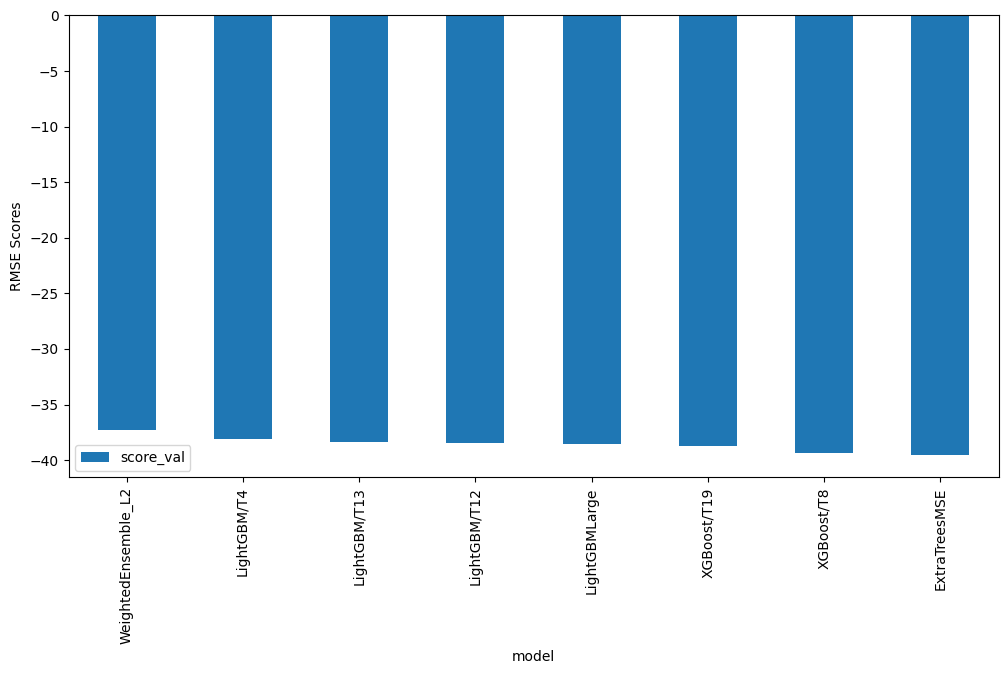

In [ ]:
# Output the model's `score_val` in a bar chart to compare performance
import matplotlib.pyplot as plt
predictor_new_hpo1.leaderboard().plot(kind="bar", x="model", y="score_val", figsize=(12, 6))
plt.ylabel("RMSE Scores")
plt.show()

In [ ]:
predictions_new_hpo1 = predictor_new_hpo1.predict(test)
predictions_new_hpo1.head()

0    16.033894
1     3.644415
2     1.690593
3     1.489766
4     1.508111
Name: count, dtype: float32

In [ ]:
# Describe the `predictions_new_hpo1` series to see if there are any negative values
predictions_new_hpo1.describe()

count    6493.000000
mean      190.507812
std       173.572083
min       -12.272228
25%        46.968765
50%       149.752762
75%       283.867035
max       937.209473
Name: count, dtype: float64

In [ ]:
# How many negative values do we have?

# Rechecking the predictions in predictions_new_hpo1
negative_pred_count = predictions_new_hpo1.apply(lambda x: 1 if x<0 else 0)

pred_pos_count = (negative_pred_count==0).sum()
pred_neg_count = (negative_pred_count==1).sum()

print("Total predictions                :", len(predictions_new_hpo1.index))
print("Total positive prediction values :", pred_pos_count)
print("Total negative prediction values :", pred_neg_count)

Total predictions                : 6493
Total positive prediction values : 6443
Total negative prediction values : 50


In [ ]:
# Remember to set all negative values to zero
predictions_new_hpo1[predictions_new_hpo1<0] = 0    # (In case, if negative values exist in the predictions_new_hpo1, set them to 0)

# Rechecking, if no predictions are less than 0
negative_pred_count = predictions_new_hpo1.apply(lambda x: 1 if x<0 else 0)
pred_neg_count = (negative_pred_count==1).sum()
print(f"No.of negative predictions: {pred_neg_count}")
print("All negative values in the predictions (if any) are set to zero successfully.")

No.of negative predictions: 0
All negative values in the predictions (if any) are set to zero successfully.


In [ ]:
# Same thing as train and test dataset
submission_new_hpo1 = pd.read_csv('sampleSubmission.csv', parse_dates = ['datetime'])
submission_new_hpo1.head()

,datetime,count
0,2011-01-20 00:00:00,0
1,2011-01-20 01:00:00,0
2,2011-01-20 02:00:00,0
3,2011-01-20 03:00:00,0
4,2011-01-20 04:00:00,0


In [ ]:
# Same submitting predictions
submission_new_hpo1["count"] = predictions_new_hpo1
submission_new_hpo1.to_csv("submission_new_hpo1.csv", index=False)
submission_new_hpo1.head()

,datetime,count
0,2011-01-20 00:00:00,16.033894
1,2011-01-20 01:00:00,3.644415
2,2011-01-20 02:00:00,1.690593
3,2011-01-20 03:00:00,1.489766
4,2011-01-20 04:00:00,1.508111


In [ ]:
!kaggle competitions submit -c bike-sharing-demand -f submission_new_hpo1.csv -m "new features with hyperparameters 1"

100% 188k/188k [00:00<00:00, 1.01MB/s]
Successfully submitted to Bike Sharing Demand

In [ ]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 7

fileName                     date                 description                          status    publicScore  privateScore  
---------------------------  -------------------  -----------------------------------  --------  -----------  ------------  
submission_new_hpo1.csv      2023-05-28 11:48:05  new features with hyperparameters 1  complete  0.49469      0.49469       
submission_new_hpo.csv       2023-05-28 11:47:18  new features with hyperparameters 1  complete  0.52785      0.52785       
submission_new_hpo.csv       2023-05-28 11:11:02  new features with hyperparameters    complete  0.52785      0.52785       
submission_new_features.csv  2023-05-28 10:44:54  new features                         complete  0.44956      0.44956       
submission.csv               2023-05-28 09:38:25  first raw submission                 complete  1.80520      1.80520       


## Step 7: Write a Report
### Refer to the markdown file for the full report
### Creating plots and table for report

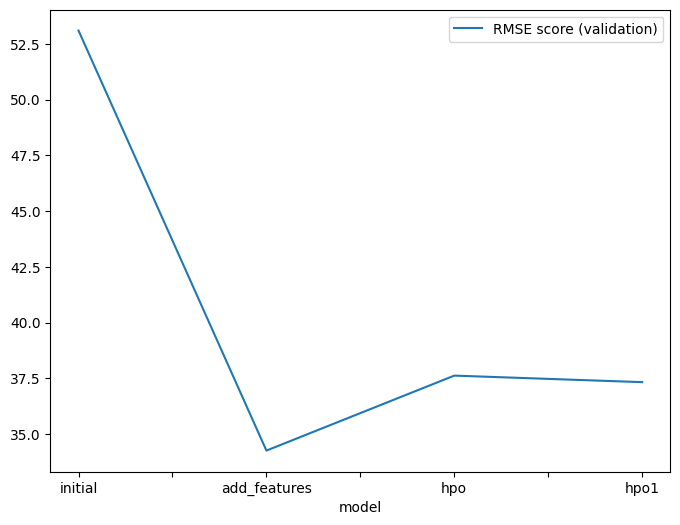

In [ ]:
# Taking the top model score from each training run and creating a line plot to show improvement
# You can create these in the notebook and save them to PNG or use some other tool (e.g. google sheets, excel)
fig = pd.DataFrame(
    {
        "model": ["initial", "add_features", "hpo", "hpo1"],
        "RMSE score (validation)": [53.0918, 34.2609, 37.622232, 37.329139]  # Note: Actual RMSE values are considered
    }
).plot(x="model", y="RMSE score (validation)", figsize=(8, 6)).get_figure()
# fig.savefig('img/model_train_score.png')

In [ ]:
 fig.savefig('/content/sample_data/img/model_train_score.png')

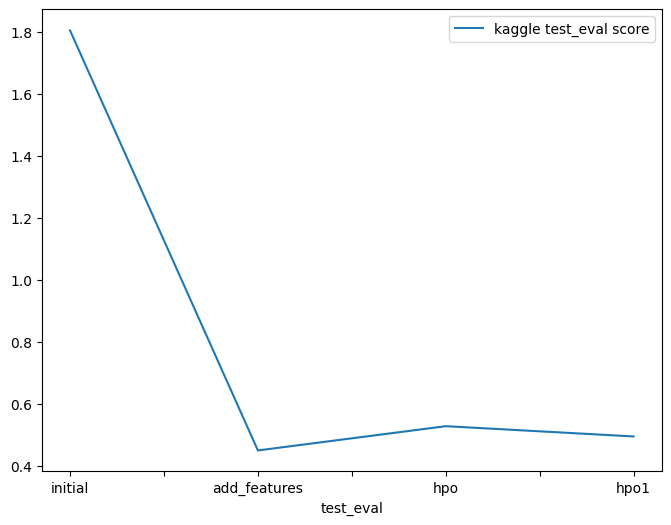

In [ ]:
# Take the 3 kaggle scores (or more) and create a line plot to show improvement
fig = pd.DataFrame(
    {
        "test_eval": ["initial", "add_features", "hpo", "hpo1"],
        "kaggle test_eval score": [1.80520, 0.44956, 0.52785, 0.49469]
    }
).plot(x="test_eval", y="kaggle test_eval score", figsize=(8, 6)).get_figure()
# fig.savefig('img/model_test_score.png')

In [ ]:
fig.savefig('/content/sample_data/img/model_test_score.png')

### Hyperparameter table

In [ ]:
# The 3 hyperparameters we tuned with the kaggle score as the result

# NOTE: Here the last 'hpo' based top-model is the 'hpo1' model with best Kaggle score within hyperparameter optimization category
pd.DataFrame({
    "model": ["initial", "add_features", "hpo (top-hpo-model: hpo1)"],
    "hpo1": ["prescribed_values", "prescribed_values", "Tree-Based Models: (GBM, XT, & XGB)"],
    "hpo2": ["prescribed_values", "prescribed_values", "LightGBMXT"],
    "hpo3": ["presets: 'best quality'", "presets: 'best quality'", "presets: 'optimize_for_deployment"],
    "score": [1.80520, 0.44956, 0.49440]
})

,model,hpo1,hpo2,hpo3,score
0,initial,prescribed_values,prescribed_values,presets: 'best quality',1.80520
1,add_features,prescribed_values,prescribed_values,presets: 'best quality',0.44956
2,hpo (top-hpo-model: hpo1),"Tree-Based Models: (GBM, XT, & XGB)",LightGBMXT,presets: 'optimize_for_deployment,0.49440


In [3]:
!jupyter nbconvert Udacity_bike_sharing_project.ipynb --to html

[NbConvertApp] WARNING | pattern 'Udacity_bike_sharing_project.ipynb' matched no files
This application is used to convert notebook files (*.ipynb)
        to various other formats.


Options
The options below are convenience aliases to configurable class-options,
as listed in the "Equivalent to" description-line of the aliases.
To see all configurable class-options for some <cmd>, use:
    <cmd> --help-all

--debug
    set log level to logging.DEBUG (maximize logging output)
    Equivalent to: [--Application.log_level=10]
--show-config
    Show the application's configuration (human-readable format)
    Equivalent to: [--Application.show_config=True]
--show-config-json
    Show the application's configuration (json format)
    Equivalent to: [--Application.show_config_json=True]
--generate-config
    generate default config file
    Equivalent to: [--JupyterApp.generate_config=True]
-y
    Answer yes to any questions instead of prompting.
    Equivalent to: [--JupyterApp.answer_yes=Tr

# **Conclusion:**
The top-ranked model was the **(add features) model** named **WeightedEnsemble_L3**, with a **validation RMSE score of 34.2609** and the best Kaggle score of **0.44956 (on test dataset).**